In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)
import glob
!whoami

ihme\yongqx2


## Fatal outcomes
- Deaths:
 - EMR_DCIS = EMR_LCIS = 0
 - ACMR = CSMR_BC + CSMR_other
- YLLs:
 - YLLs_DCIS = YLLs_LCIS = 0
 - YLLs_total = YLLs_BC + YLLs_other

## Non-fatal outcomes
- YLDs:
 - YLDs_DCIS = YLDs_LCIS = YLDs_other = 0
 - YLDs_total = YLDs_BC
- Prevalence:
 - Crude prevalence ratio of DCIS = PREV_DCIS / PREV_BC = 0.33
 - Crude prevalence ratio of LCIS = PREV_LCIS / PREV_BC = 0.07
 - PREV_DCIS / PREV_LCIS = 4.7 (compare to 13 from Kong et al.)
- Incidence:
 - Crude prevalence ratio of DCIS = INCIDENCE_DCIS / INCIDENCE_BC = 0.33 (compare to 0.3 from Virnig et al.)
 - Crude prevalence ratio of LCIS = DENCE_LCIS / INCIDENCE_BC = 0.07
 - INCIINCIDENCE_DCIS / INCIDENCE_LCIS = 4.7

In [2]:
# change the working directory to where you pull sim count space results
%cd C:/Users/yongqx2/Desktop/Sim Science/Swiss RE Cancer/count_data
#%cd /ihme/costeffectiveness/results/vivarium_csu_swissre_cancer/v1.0_cancer/swissre_coverage/2020_06_16_14_09_07/count_data

C:\Users\yongqx2\Desktop\Sim Science\Swiss RE Cancer\count_data


In [3]:
fnames = glob.glob('*.csv')
df = {}
for fname in fnames:
    df[fname] = pd.read_csv(fname).iloc[:, 1:]

In [4]:
df.keys()

dict_keys(['deaths.csv', 'person_time.csv', 'population.csv', 'state_person_time.csv', 'transition_count.csv', 'ylds.csv', 'ylls.csv'])

In [5]:
cols = ['age_cohort', 'sex', 'year', 'input_draw', 'cause', 'measure']

In [6]:
# zero person_time
df['person_time.csv'][df['person_time.csv'].value == 0.0]

sex  year  input_draw  value age_cohort      measure
12669  female  2038          78    0.0      80_85  person_time
12697  female  2038         146    0.0      80_85  person_time
12767  female  2038         223    0.0      80_85  person_time
12809  female  2038         269    0.0      80_85  person_time
...       ...   ...         ...    ...        ...          ...
13103  female  2038         632    0.0      80_85  person_time
25283    male  2037         100    0.0      80_85  person_time
25983    male  2038         100    0.0      80_85  person_time
26165    male  2038         357    0.0      80_85  person_time

[10 rows x 6 columns]

# Deaths

In [7]:
deaths_all_causes = (df['deaths.csv']
                     .groupby([c for c in cols if c != 'cause'])
                     .value.sum()
                     .reset_index())
deaths_all_causes['cause'] = 'all_causes'

deaths = pd.concat([deaths_all_causes, df['deaths.csv']], ignore_index=True)
deaths

age_cohort     sex  year  input_draw measure    value         cause
0          15_20  female  2020           3   death  30235.0    all_causes
1          15_20  female  2020          21   death  30498.0    all_causes
2          15_20  female  2020          29   death  30518.0    all_causes
3          15_20  female  2020          55   death  30464.0    all_causes
...          ...     ...   ...         ...     ...      ...           ...
79796      65_70    male  2038         990   death      0.0  other_causes
79797      70_75    male  2038         990   death      0.0  other_causes
79798      75_80    male  2038         990   death      0.0  other_causes
79799      80_85    male  2038         990   death      0.0  other_causes

[79800 rows x 7 columns]

In [8]:
csmr = (deaths.drop(columns='measure').set_index([c for c in cols if c != 'measure'])
        .div(df['person_time.csv'].drop(columns='measure').set_index([c for c in cols if c not in ['cause', 'measure']]))
        .mul(100_000)
        .reset_index())
csmr

age_cohort     sex  year  input_draw          cause         value
0          15_20  female  2020           3     all_causes  33312.771772
1          15_20  female  2020           3  breast_cancer  33312.771772
2          15_20  female  2020           3   other_causes      0.000000
3          15_20  female  2020          21     all_causes  33572.344348
...          ...     ...   ...         ...            ...           ...
79796      80_85    male  2038         973   other_causes      0.000000
79797      80_85    male  2038         990     all_causes  26276.978417
79798      80_85    male  2038         990  breast_cancer  26276.978417
79799      80_85    male  2038         990   other_causes      0.000000

[79800 rows x 6 columns]

In [9]:
csmr_summary = (csmr
                .groupby([c for c in cols if c not in ['input_draw', 'measure']])
                .value.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())
csmr_summary

age_cohort     sex  year          cause          mean          2.5%  \
0         15_20  female  2020     all_causes  33630.675952  33290.307035   
1         15_20  female  2020  breast_cancer  33630.675952  33290.307035   
2         15_20  female  2020   other_causes      0.000000      0.000000   
3         15_20  female  2021     all_causes  42339.513702  41899.213605   
...         ...     ...   ...            ...           ...           ...   
1592      80_85    male  2037   other_causes      0.000000      0.000000   
1593      80_85    male  2038     all_causes  73118.847204      0.000000   
1594      80_85    male  2038  breast_cancer  70975.361289      0.000000   
1595      80_85    male  2038   other_causes   2143.485915      0.000000   

              97.5%  
0      33932.109833  
1      33932.109833  
2          0.000000  
3      42745.912412  
...             ...  
1592       0.000000  
1593  241978.125000  
1594  241978.125000  
1595       0.000000  

[1596 rows x 7 columns]

In [10]:
def plot_over_year(data: pd.DataFrame, measure: str, col_name: str, select: str):
    data_sub = data[getattr(data, col_name) == select]
    #ymax= data_sub['97.5%'].max()
    
    plt.figure(figsize=(16, 10), dpi=150)
    
    for i, age_group in enumerate(data_sub.age_cohort.unique()):
        plt.subplot(4, 4, i+1)
        plt.subplots_adjust(wspace=0.3, hspace=0.6)
        data_age_group = data_sub[data_sub.age_cohort == age_group]
        for sex in ['female', 'male']:
            data_sex = data_age_group[data_age_group.sex == sex]
            plt.plot(data_sex.year, data_sex['mean'], label=sex)
            plt.fill_between(data_sex.year, data_sex['2.5%'], data_sex['97.5%'], alpha=.3)
            #plt.ylim(ymax=ymax)
            plt.title(age_group)
    plt.legend(loc=(1.1, .1))
    if measure == 'Deaths':
        plt.suptitle(f'{measure} due to {select} (per 100,000 PY)', y=0.95, fontsize=14)
    elif measure == 'Incidence':
        if select == 'susceptible_to_breast_cancer_to_ductal_carcinoma_in_situ_event_count':
            select = 'ductal_carcinoma_in_situ'
        elif select == 'susceptible_to_breast_cancer_to_lobular_carcinoma_in_situ_event_count':
            select = 'lobular_carcinoma_in_situ'
        elif select == 'breast_carcinoma_in_situ_to_breast_cancer_event_count':
            select = 'breast_cancer'
        else: select = select.split('_event_count')[0]
        plt.suptitle(f'{measure} of {select} (per 100,000 PY)', y=0.95, fontsize=14)
    else:
        plt.suptitle(f'{measure} of {select} (%)', y=0.95, fontsize=14)

In [11]:
def plot_over_age(data: pd.DataFrame, measure: str, col_name: str, select: str):
    data_sub = data[getattr(data, col_name) == select]
    ymax= data_sub['mean'].max()
    
    plt.figure(figsize=(16, 6), dpi=150)
    
    for i, sex in enumerate(['female', 'male']):
        plt.subplot(1, 2, i+1)
        plt.subplots_adjust(wspace=0.3)
        data_sex = data_sub[data_sub.sex == sex]
        for year in range(2020, 2039):
            data_year = data_sex[data_sex.year == year]
            plt.plot(data_year.age_cohort, data_year['mean'], marker='o', label=year)
            #plt.fill_between(data_year.age_cohort, data_year['2.5%'], data_year['97.5%'], alpha=.3)
        plt.ylim(ymax=ymax)
        plt.title(sex)
        plt.xticks(rotation=45)
        plt.xlabel('Age group')
    plt.legend(loc=(1.1, .1))
        
    
    if measure == 'Deaths':
        plt.suptitle(f'{measure} due to {select} (per 100,000 PY)', y=1, fontsize=14)
    elif measure == 'Incidence':
        if select == 'susceptible_to_breast_cancer_to_ductal_carcinoma_in_situ_event_count':
            select = 'ductal_carcinoma_in_situ'
        elif select == 'susceptible_to_breast_cancer_to_lobular_carcinoma_in_situ_event_count':
            select = 'lobular_carcinoma_in_situ'
        elif select == 'breast_carcinoma_in_situ_to_breast_cancer_event_count':
            select = 'breast_cancer'
        else: select = select.split('_event_count')[0]
        plt.suptitle(f'{measure} of {select} (per 100,000 PY)', y=1, fontsize=14)
    else:
        plt.suptitle(f'{measure} of {select} (%)', y=1, fontsize=14)

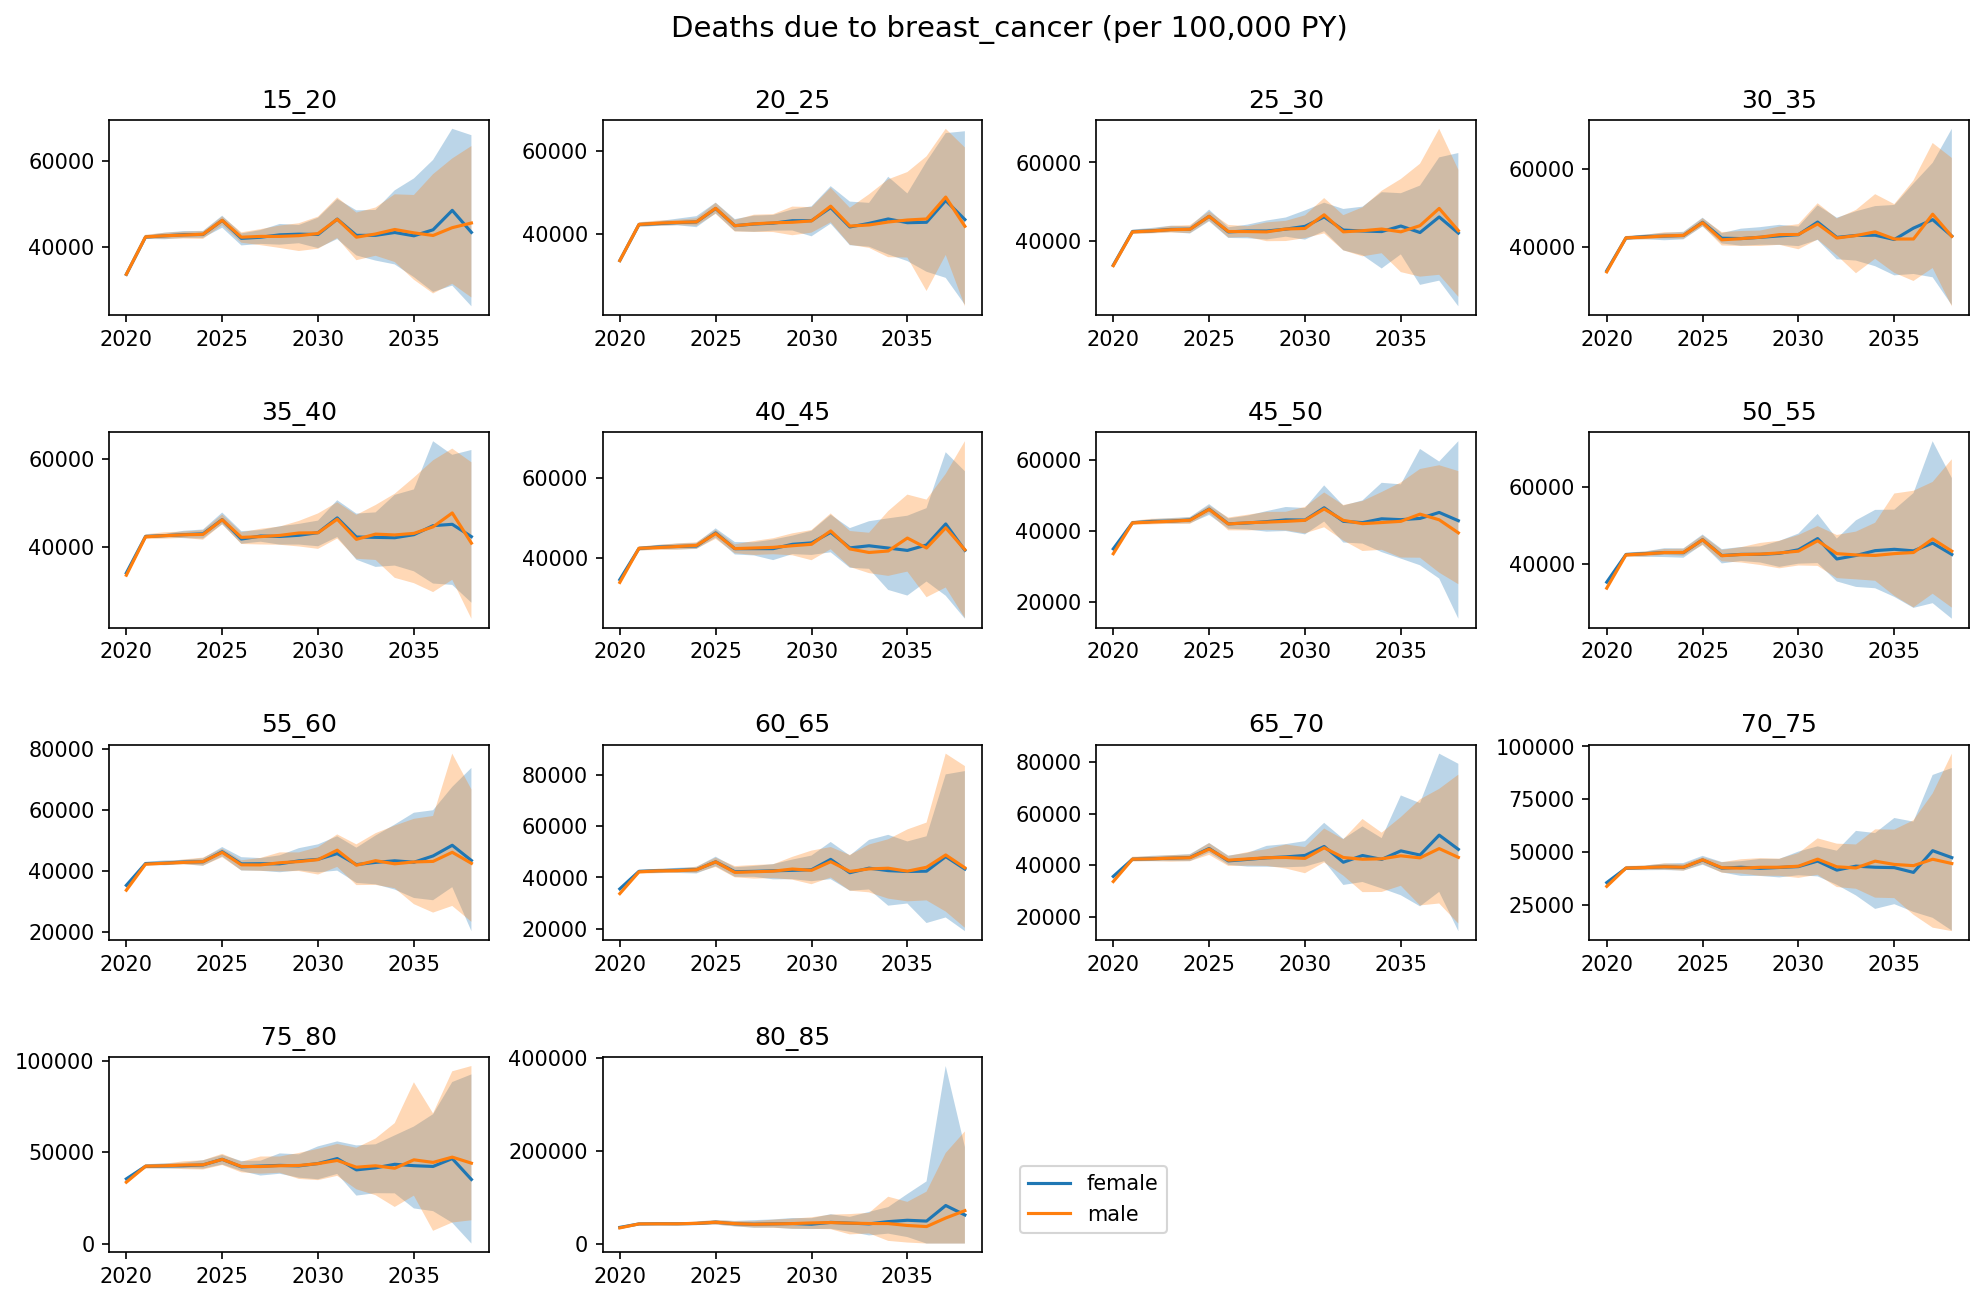

In [12]:
plot_over_year(csmr_summary, 'Deaths', 'cause', 'breast_cancer')

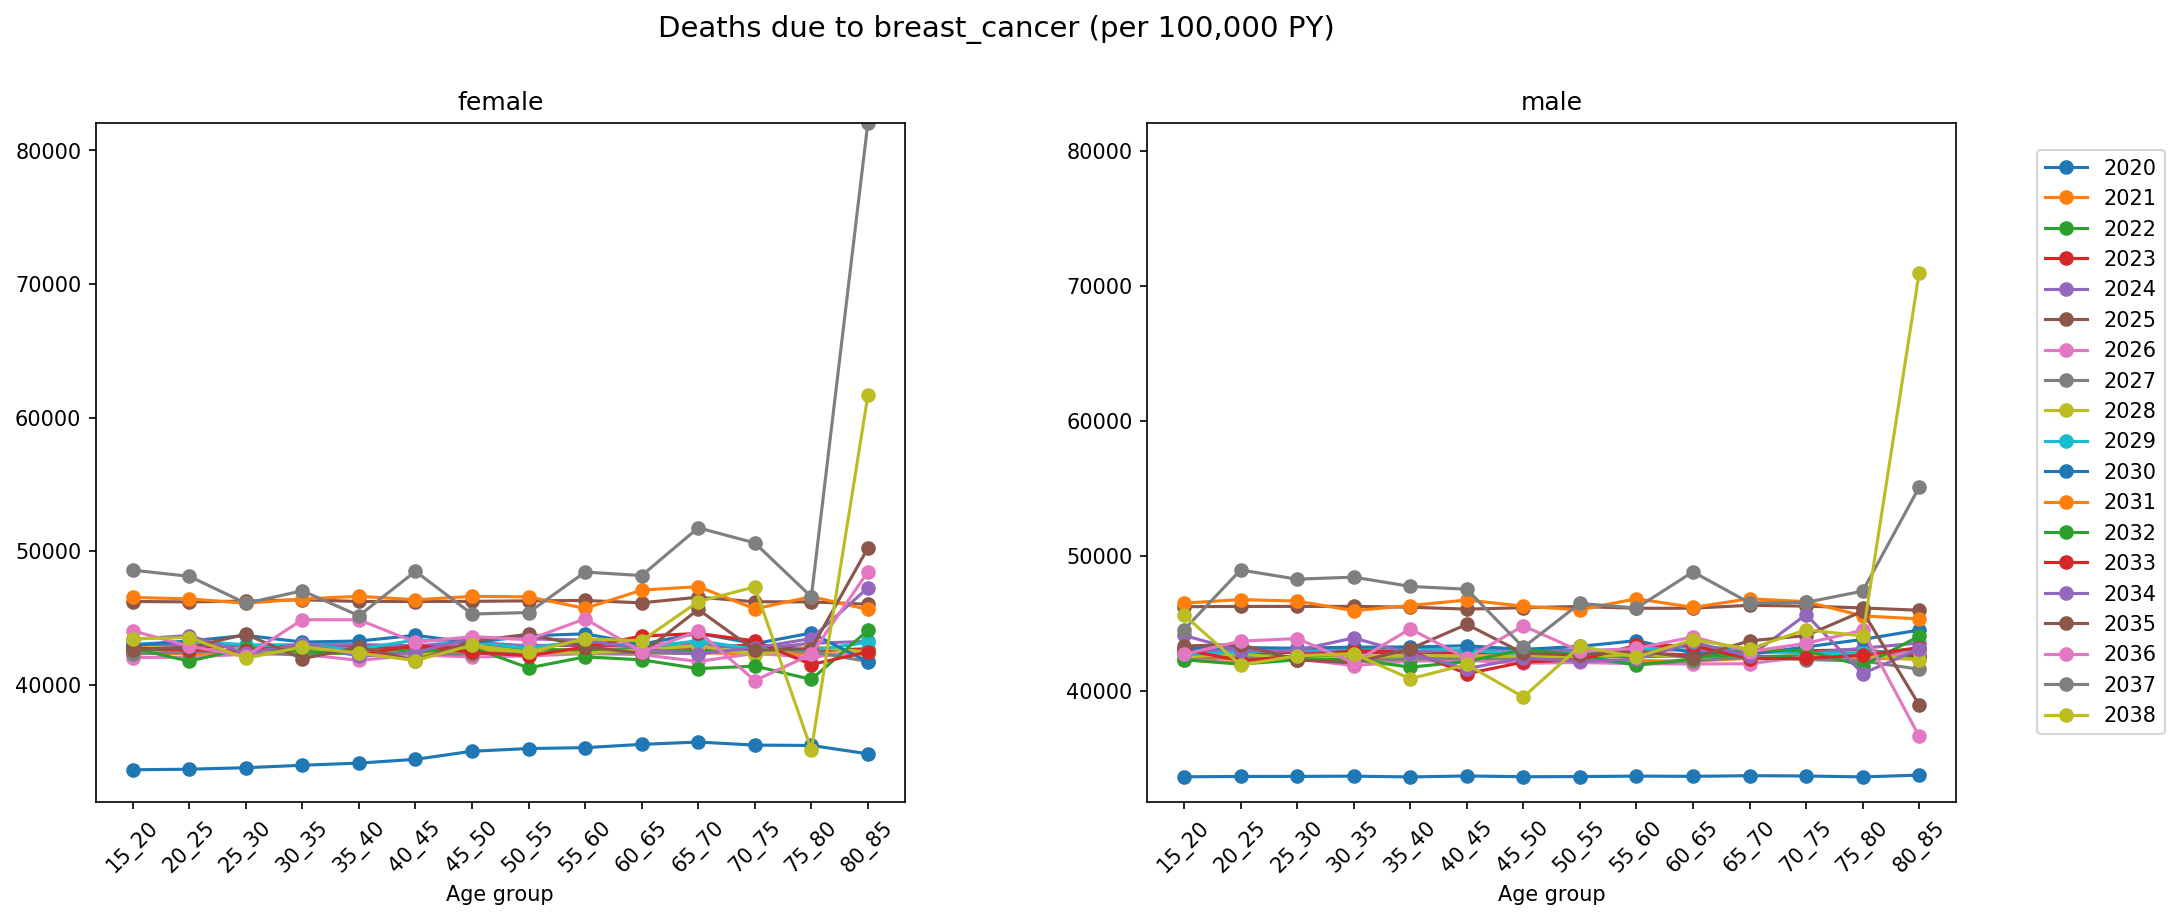

In [13]:
plot_over_age(csmr_summary, 'Deaths', 'cause', 'breast_cancer')

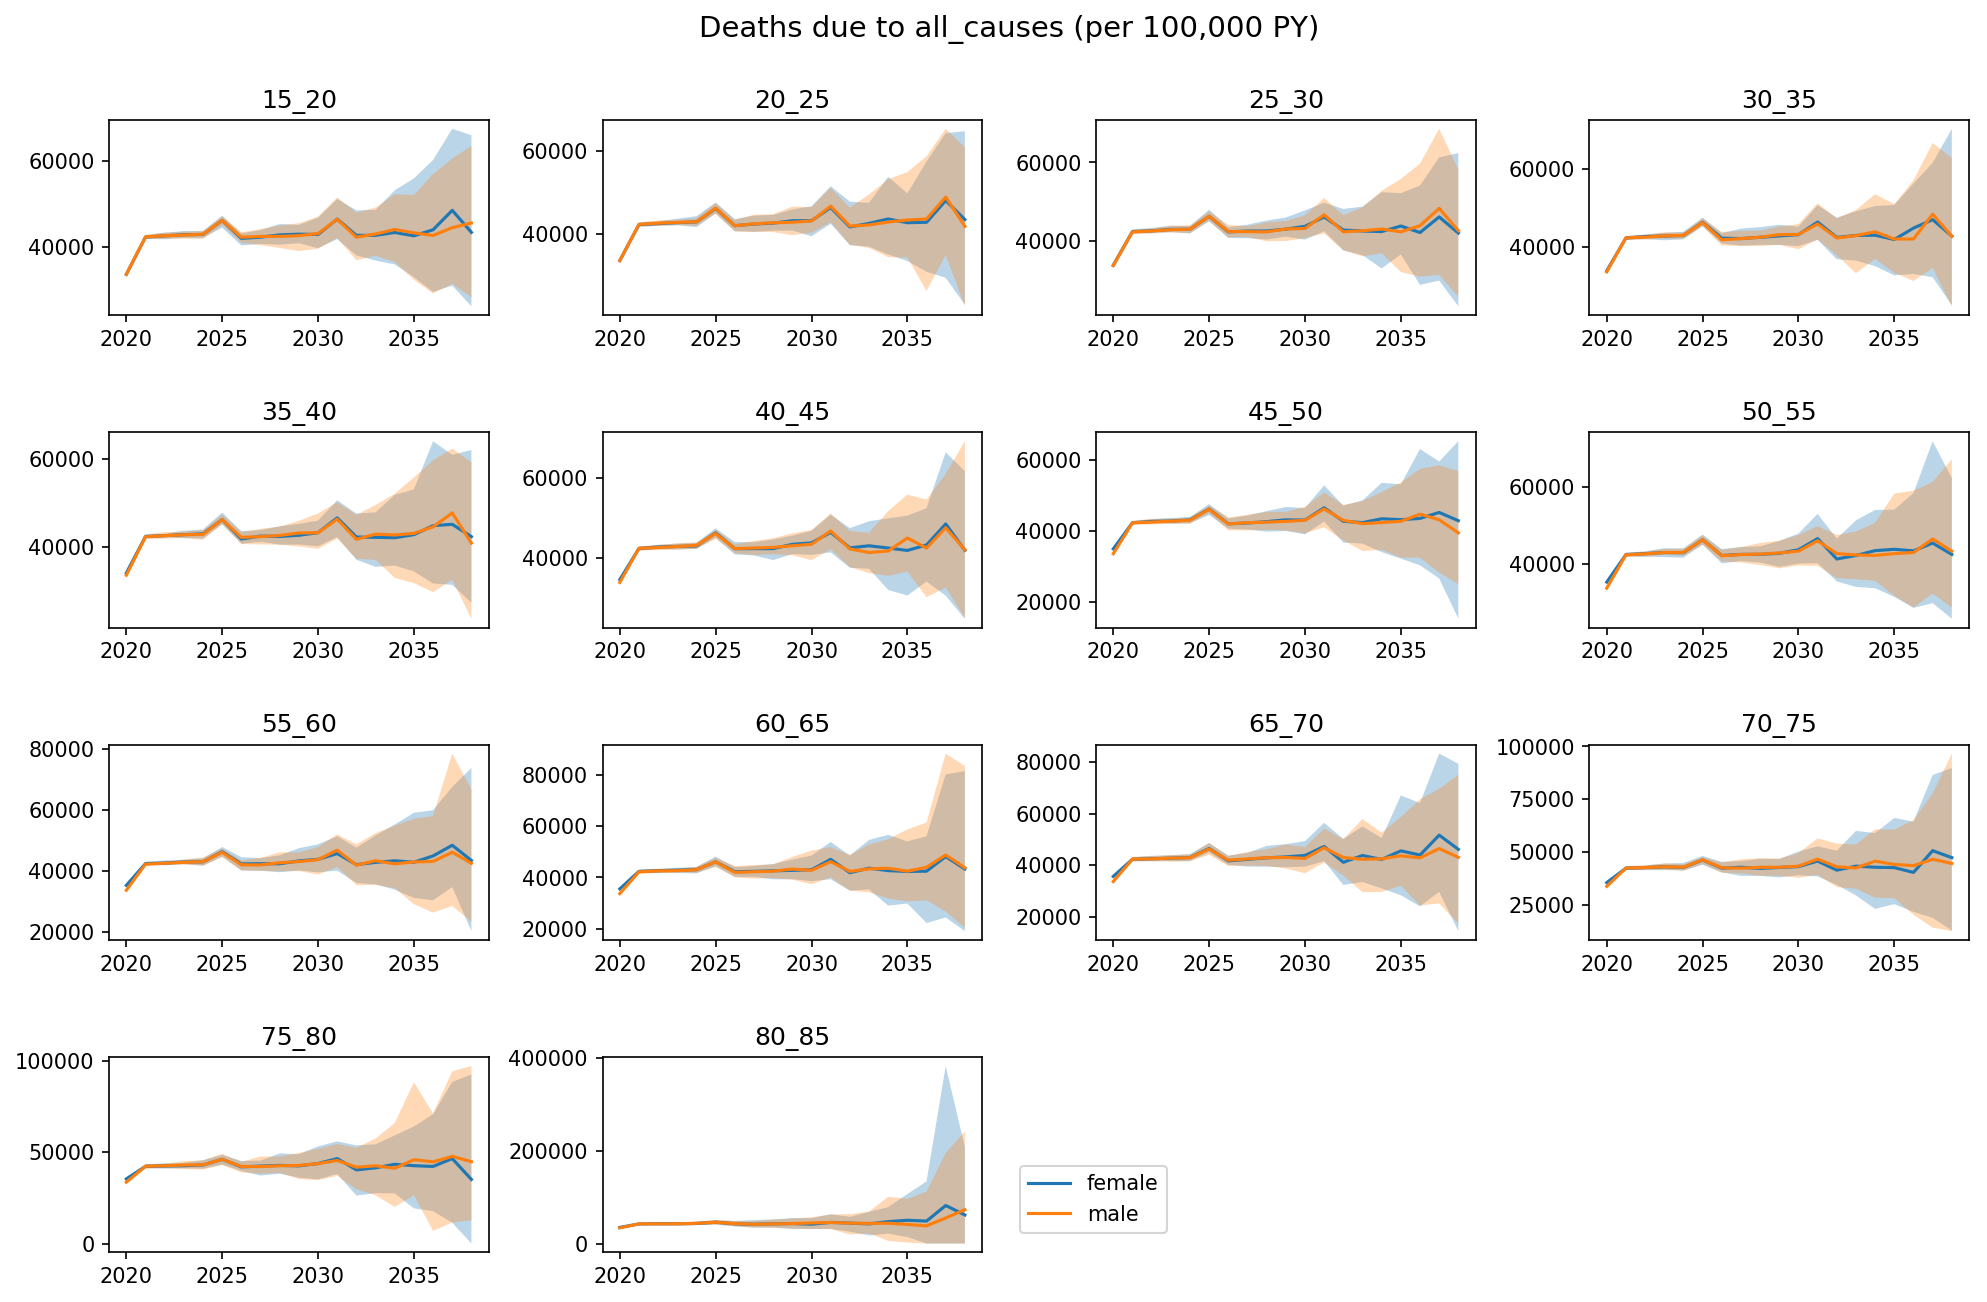

In [14]:
plot_over_year(csmr_summary, 'Deaths', 'cause', 'all_causes')

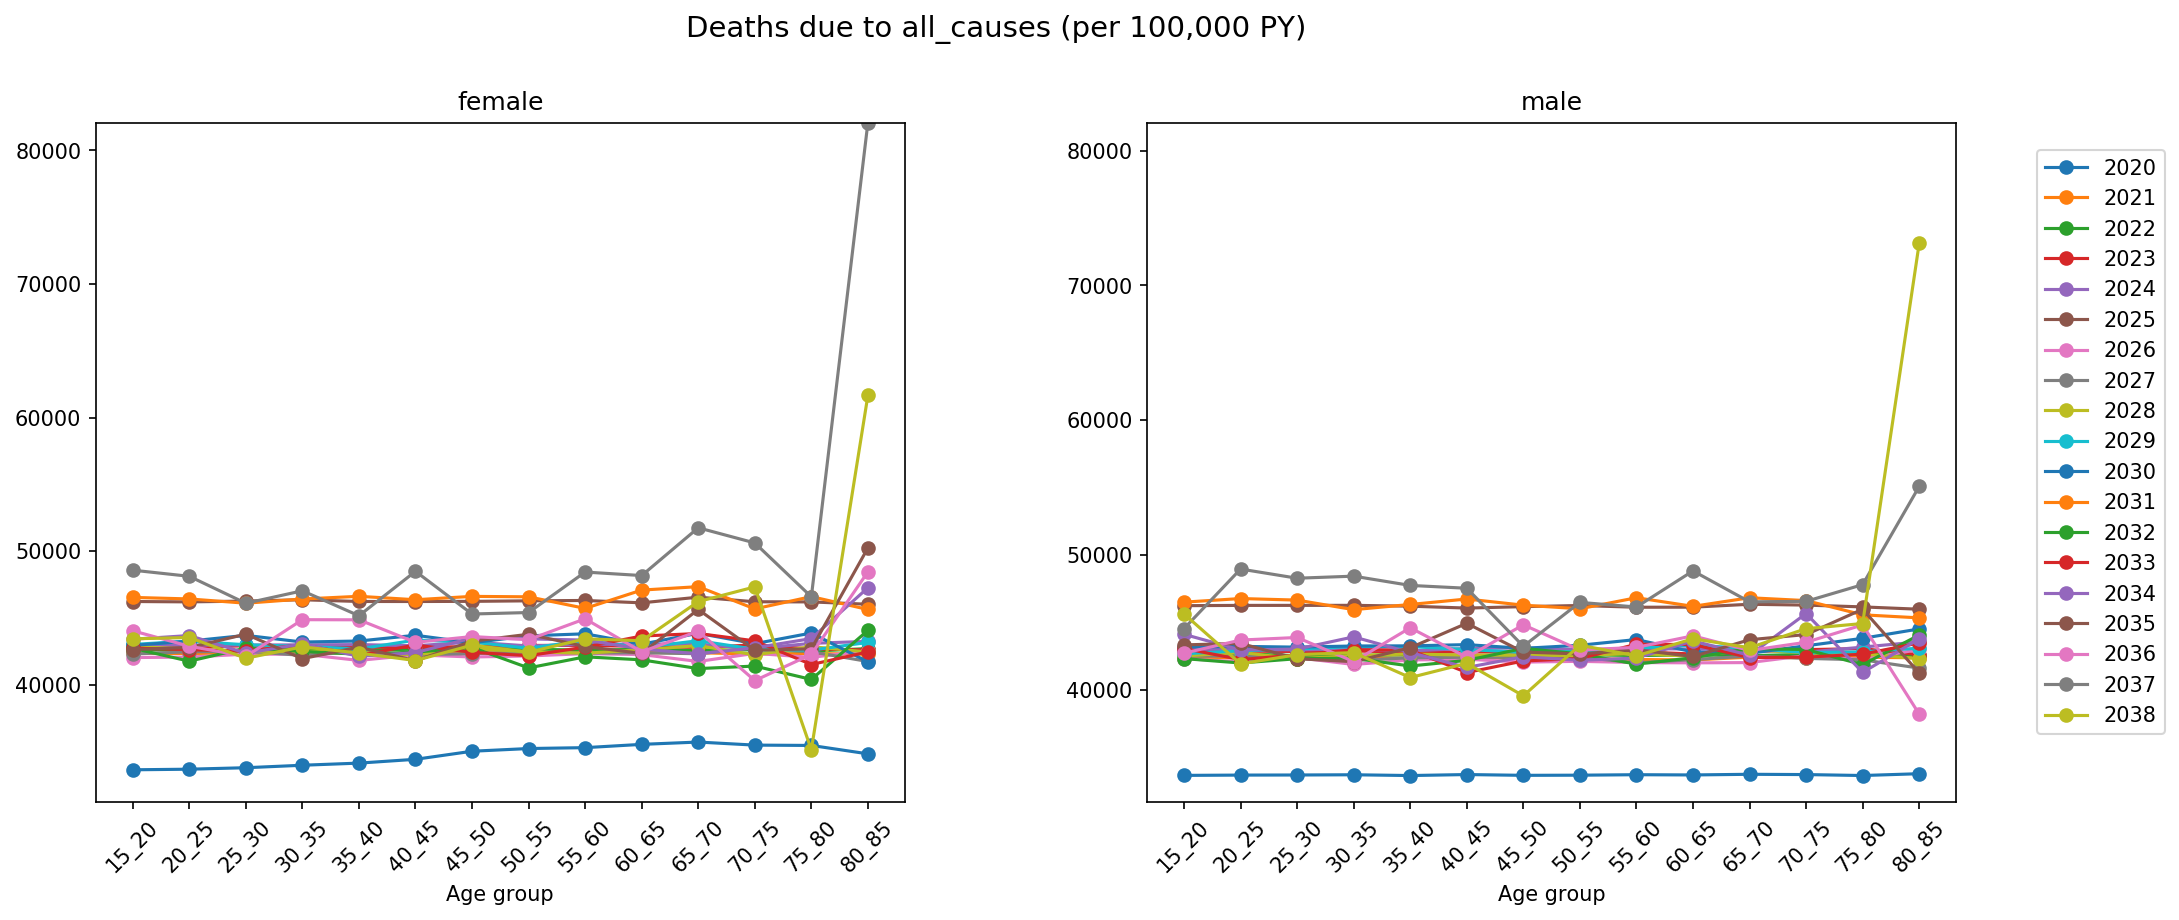

In [15]:
plot_over_age(csmr_summary, 'Deaths', 'cause', 'all_causes')

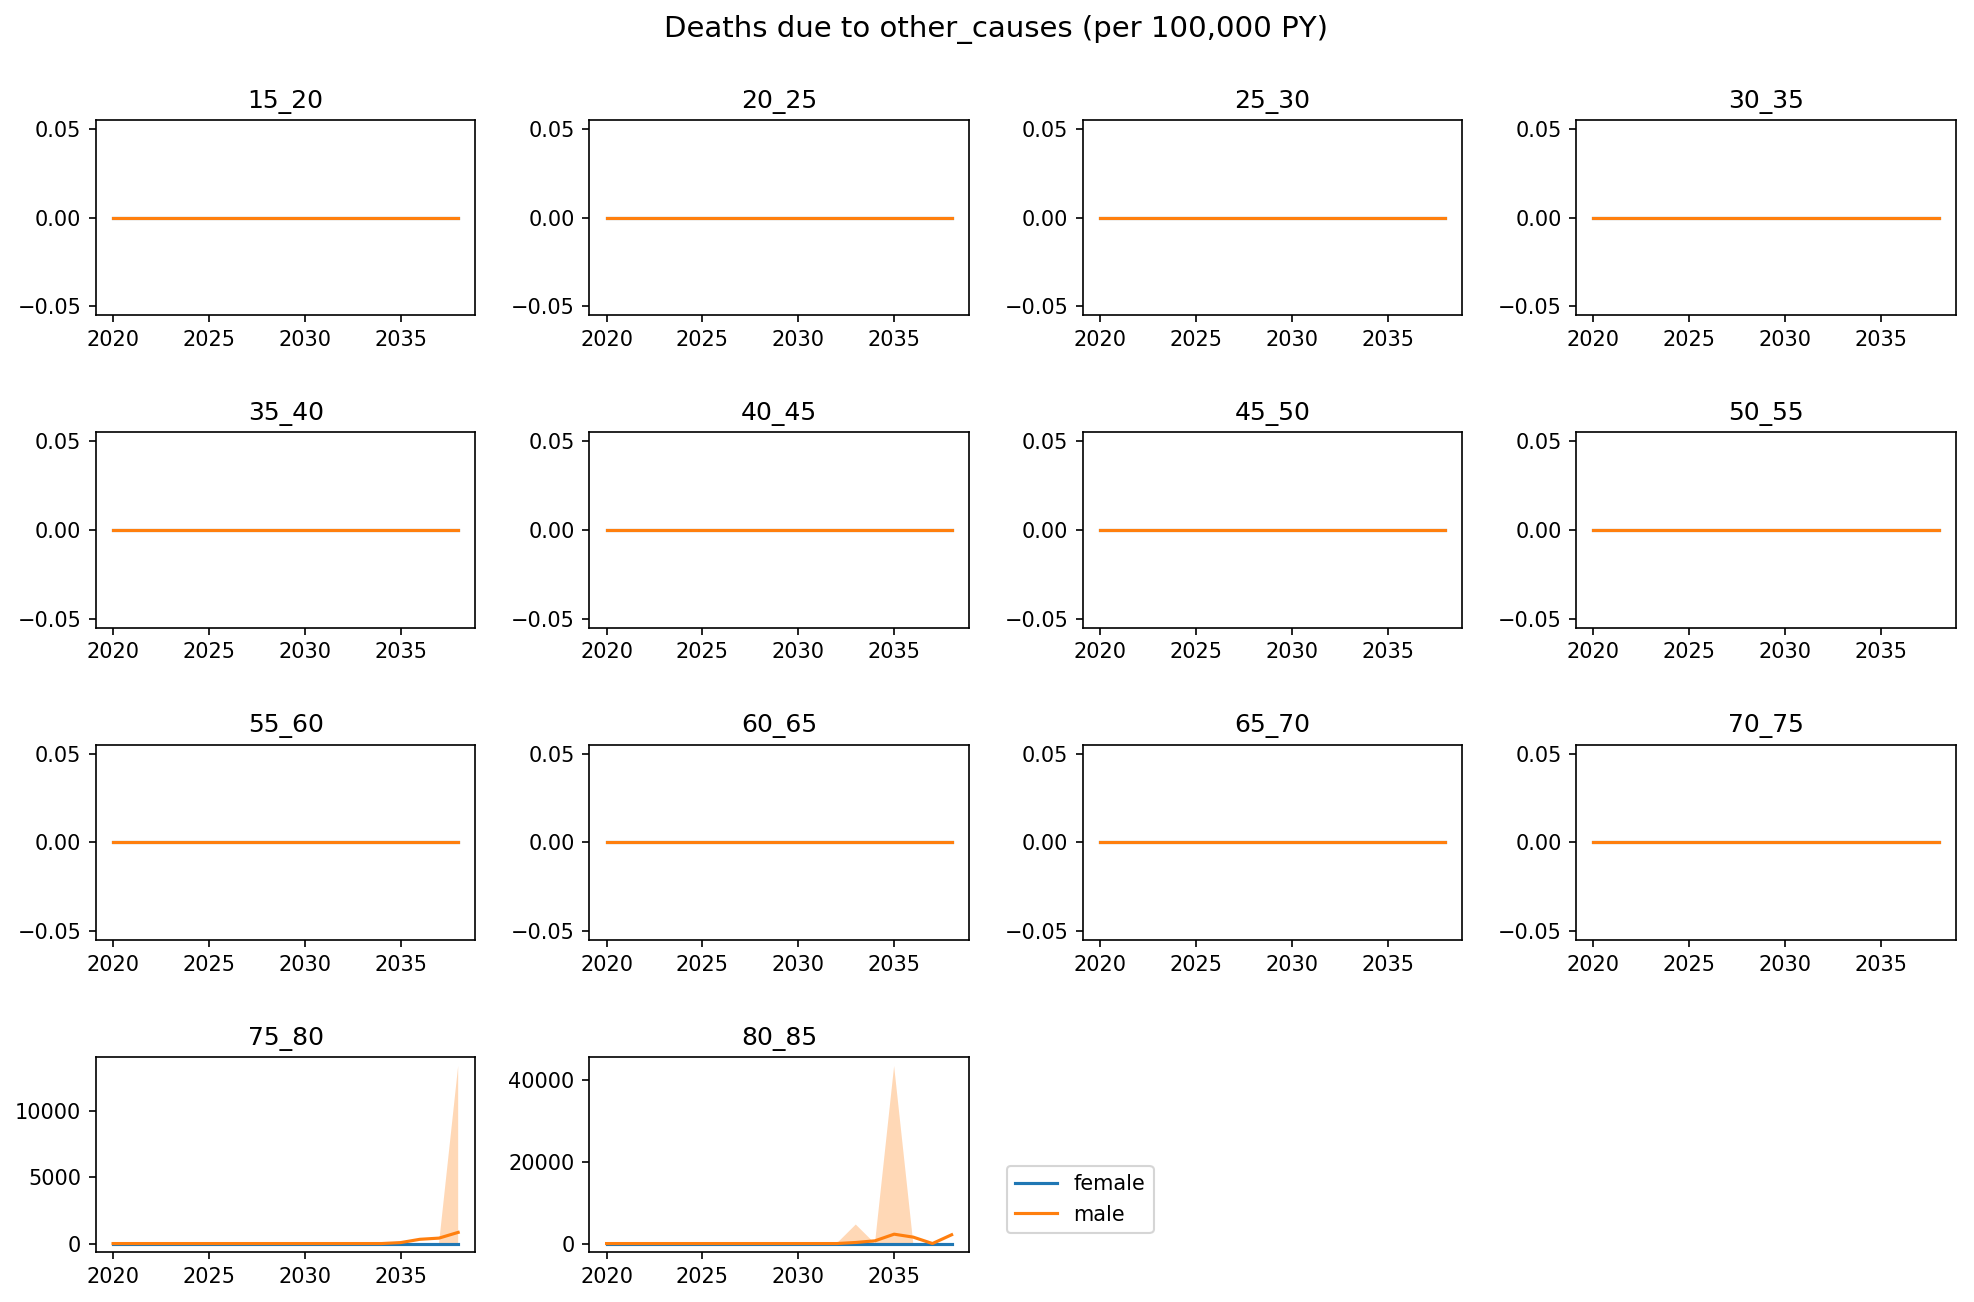

In [16]:
plot_over_year(csmr_summary, 'Deaths', 'cause', 'other_causes')

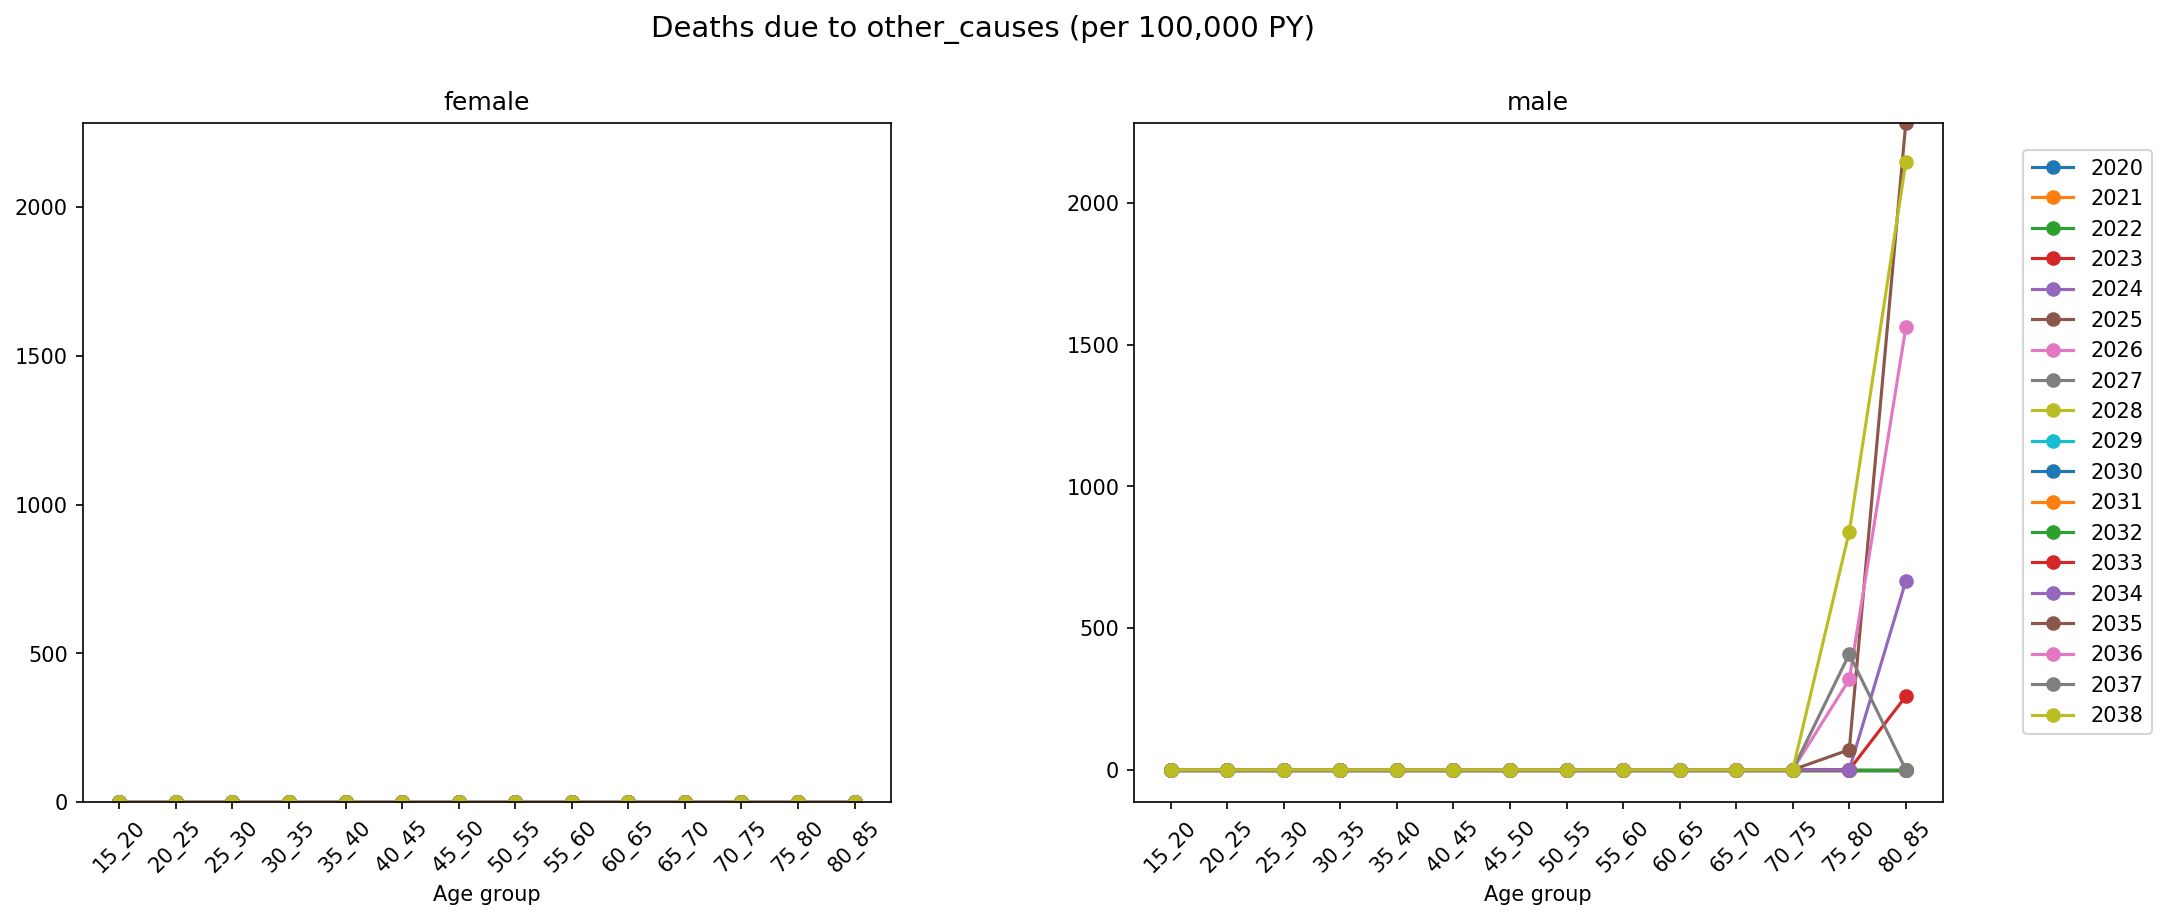

In [17]:
plot_over_age(csmr_summary, 'Deaths', 'cause', 'other_causes')

# Incidence

In [18]:
bc_from_dcis = (df['transition_count.csv']
                .query('measure == "ductal_carcinoma_in_situ_to_breast_cancer_event_count"')
                .drop(columns='measure')
                .set_index([c for c in cols if c not in ['cause', 'measure']]))

bc_from_lcis = (df['transition_count.csv']
                .query('measure == "lobular_carcinoma_in_situ_to_breast_cancer_event_count"')
                .drop(columns='measure')
                .set_index([c for c in cols if c not in ['cause', 'measure']]))

bc_from_bcis = (bc_from_dcis + bc_from_lcis).reset_index()
bc_from_bcis['measure'] = 'breast_carcinoma_in_situ_to_breast_cancer_event_count'
bc_from_bcis

age_cohort     sex  year  input_draw    value  \
0          15_20  female  2020           3  33016.0   
1          20_25  female  2020           3  33105.0   
2          25_30  female  2020           3  32758.0   
3          30_35  female  2020           3  33250.0   
...          ...     ...   ...         ...      ...   
26596      65_70    male  2038         990      2.0   
26597      70_75    male  2038         990      3.0   
26598      75_80    male  2038         990      2.0   
26599      80_85    male  2038         990      1.0   

                                                 measure  
0      breast_carcinoma_in_situ_to_breast_cancer_even...  
1      breast_carcinoma_in_situ_to_breast_cancer_even...  
2      breast_carcinoma_in_situ_to_breast_cancer_even...  
3      breast_carcinoma_in_situ_to_breast_cancer_even...  
...                                                  ...  
26596  breast_carcinoma_in_situ_to_breast_cancer_even...  
26597  breast_carcinoma_in_situ_to_breast_cancer_even...  
26598  breast_carcinoma_in_situ_to_breast_cancer_even...  
26599  breast_carcinoma_in_situ_to_breast_cancer_even...  

[26600 rows x 6 columns]

In [19]:
incidence_count = pd.concat([bc_from_bcis, df['transition_count.csv']], ignore_index=True)
incidence_count

age_cohort     sex  year  input_draw    value  \
0           15_20  female  2020           3  33016.0   
1           20_25  female  2020           3  33105.0   
2           25_30  female  2020           3  32758.0   
3           30_35  female  2020           3  33250.0   
...           ...     ...   ...         ...      ...   
132996      80_85    male  2038         990      0.0   
132997      80_85    male  2038         990      1.0   
132998      80_85    male  2038         990      1.0   
132999      80_85    male  2038         990      0.0   

                                                  measure  
0       breast_carcinoma_in_situ_to_breast_cancer_even...  
1       breast_carcinoma_in_situ_to_breast_cancer_even...  
2       breast_carcinoma_in_situ_to_breast_cancer_even...  
3       breast_carcinoma_in_situ_to_breast_cancer_even...  
...                                                   ...  
132996  susceptible_to_breast_cancer_to_lobular_carcin...  
132997  susceptible_to_breast_cancer_to_ductal_carcino...  
132998  ductal_carcinoma_in_situ_to_breast_cancer_even...  
132999  lobular_carcinoma_in_situ_to_breast_cancer_eve...  

[133000 rows x 6 columns]

In [20]:
incidence_rate = (incidence_count.set_index([c for c in cols if c != 'cause'])
                  .div(df['person_time.csv'].drop(columns='measure').set_index([c for c in cols if c not in ['cause', 'measure']]))
                  .mul(100_000)
                  .reset_index())
incidence_rate

age_cohort     sex  year  input_draw  \
0           15_20  female  2020           3   
1           15_20  female  2020           3   
2           15_20  female  2020           3   
3           15_20  female  2020           3   
...           ...     ...   ...         ...   
132996      80_85    male  2038         990   
132997      80_85    male  2038         990   
132998      80_85    male  2038         990   
132999      80_85    male  2038         990   

                                                  measure         value  
0       breast_carcinoma_in_situ_to_breast_cancer_even...  36376.863662  
1       susceptible_to_breast_cancer_to_lobular_carcin...  31671.097225  
2       susceptible_to_breast_cancer_to_ductal_carcino...   7358.888793  
3       ductal_carcinoma_in_situ_to_breast_cancer_even...   6893.931304  
...                                                   ...           ...  
132996  susceptible_to_breast_cancer_to_lobular_carcin...      0.000000  
132997  susceptible_to_breast_cancer_to_ductal_carcino...  26276.978417  
132998  ductal_carcinoma_in_situ_to_breast_cancer_even...  26276.978417  
132999  lobular_carcinoma_in_situ_to_breast_cancer_eve...      0.000000  

[133000 rows x 6 columns]

In [21]:
incidence_rate_summary = (incidence_rate
                          .groupby([c for c in cols if c not in ['input_draw', 'cause']])
                          .value.describe(percentiles=[.025, .975])
                          .filter(['mean', '2.5%', '97.5%'])
                          .reset_index())
incidence_rate_summary

age_cohort     sex  year  \
0         15_20  female  2020   
1         15_20  female  2020   
2         15_20  female  2020   
3         15_20  female  2020   
...         ...     ...   ...   
2656      80_85    male  2038   
2657      80_85    male  2038   
2658      80_85    male  2038   
2659      80_85    male  2038   

                                                measure          mean  \
0     breast_carcinoma_in_situ_to_breast_cancer_even...  36662.756985   
1     ductal_carcinoma_in_situ_to_breast_cancer_even...   6873.002245   
2     lobular_carcinoma_in_situ_to_breast_cancer_eve...  29789.754740   
3     susceptible_to_breast_cancer_to_ductal_carcino...   7370.432427   
...                                                 ...           ...   
2656  ductal_carcinoma_in_situ_to_breast_cancer_even...  23946.975093   
2657  lobular_carcinoma_in_situ_to_breast_cancer_eve...  34977.800873   
2658  susceptible_to_breast_cancer_to_ductal_carcino...  22135.219141   
2659  susceptible_to_breast_cancer_to_lobular_carcin...  32891.365717   

              2.5%          97.5%  
0     36334.994025   36985.616406  
1      6682.646453    7027.702950  
2     29481.619316   30171.074354  
3      7195.892189    7543.352985  
...            ...            ...  
2656      0.000000  187408.035714  
2657      0.000000  116432.003401  
2658      0.000000  183403.101504  
2659      0.000000  116432.003401  

[2660 rows x 7 columns]

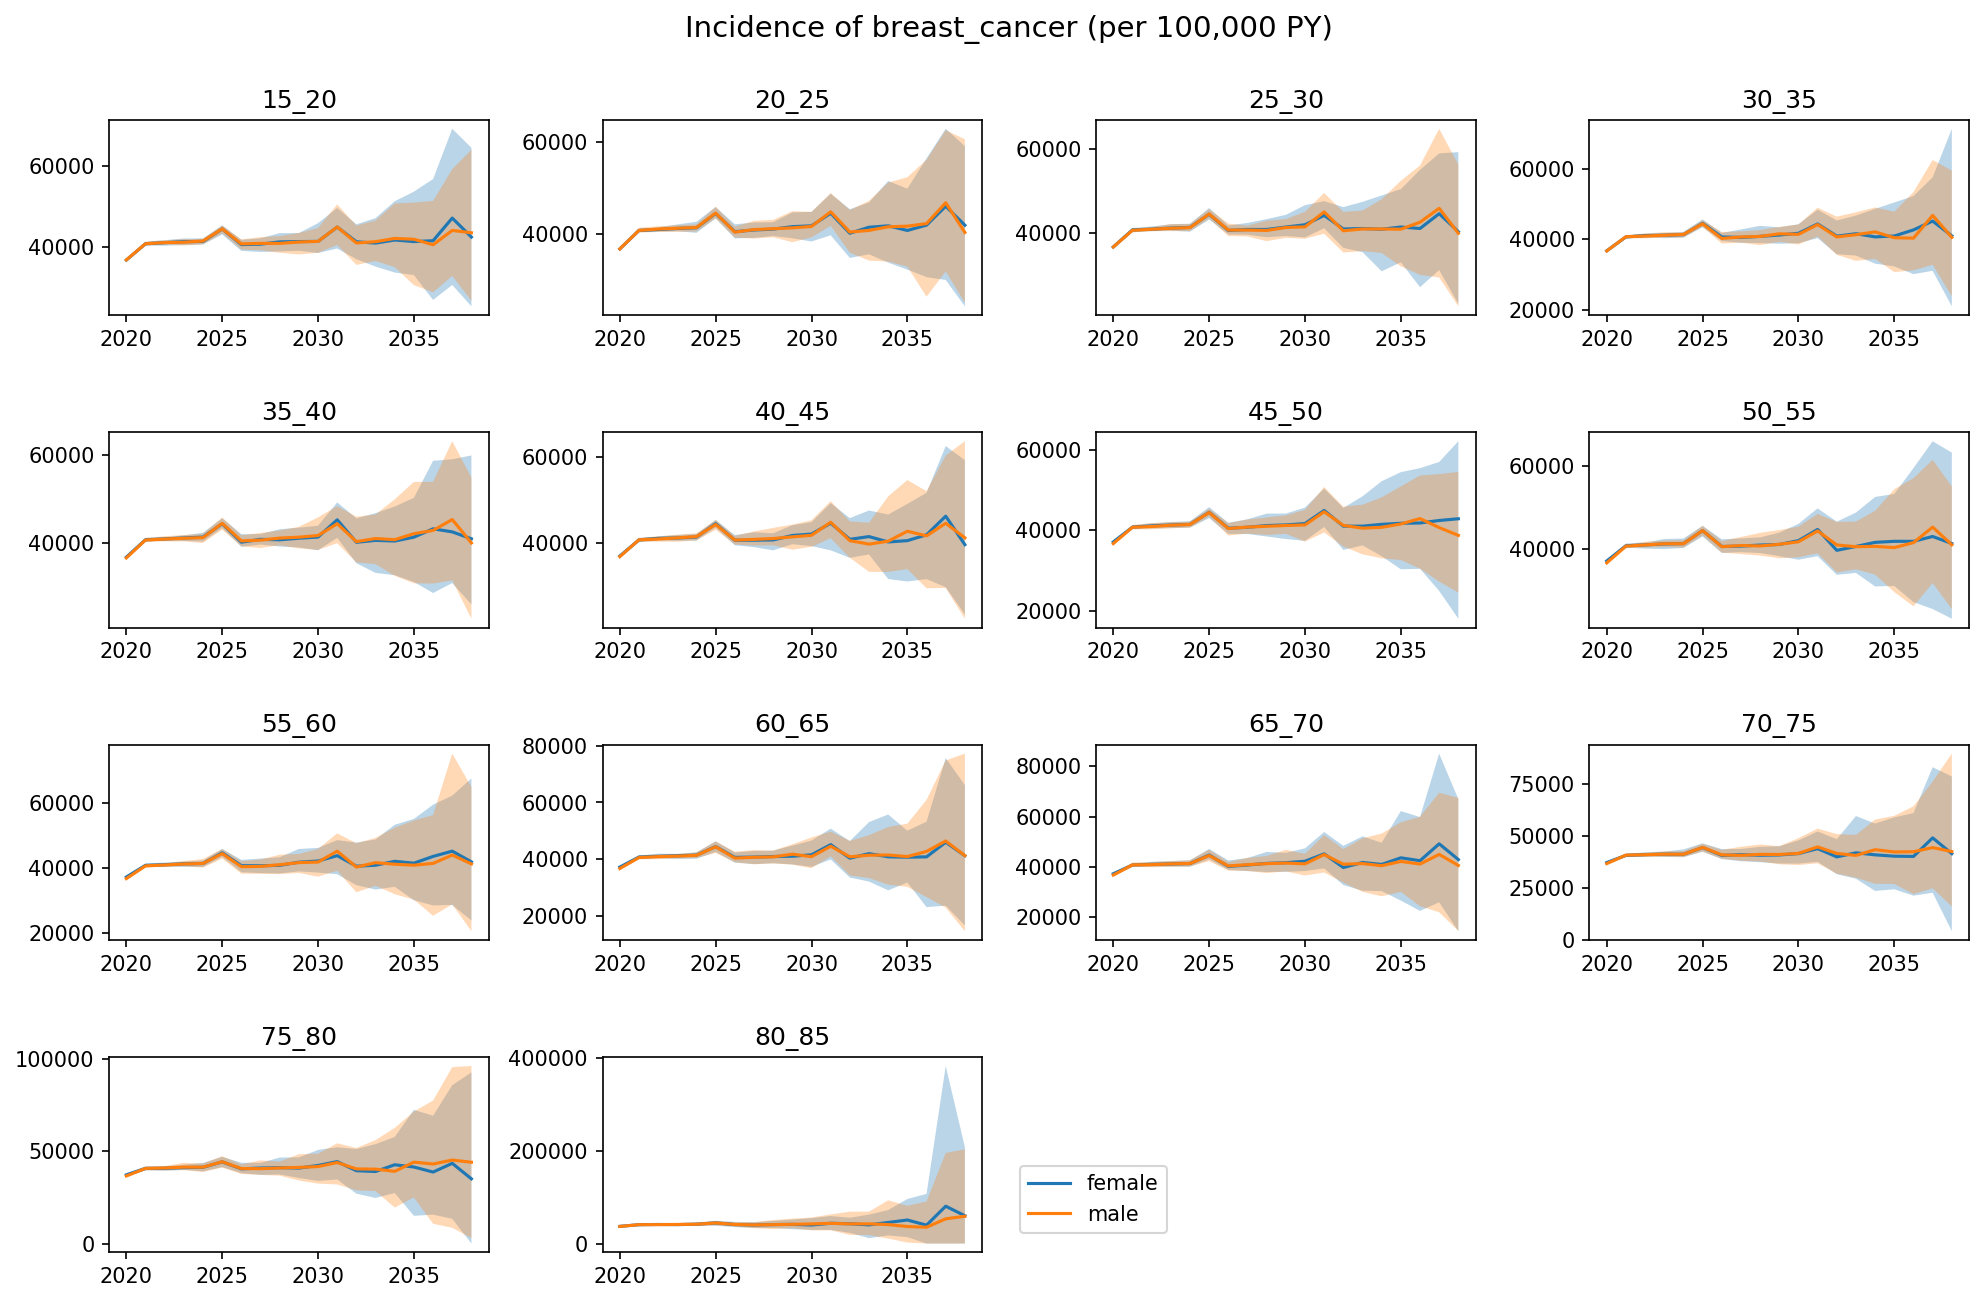

In [22]:
plot_over_year(incidence_rate_summary, 'Incidence', 'measure', 'breast_carcinoma_in_situ_to_breast_cancer_event_count')

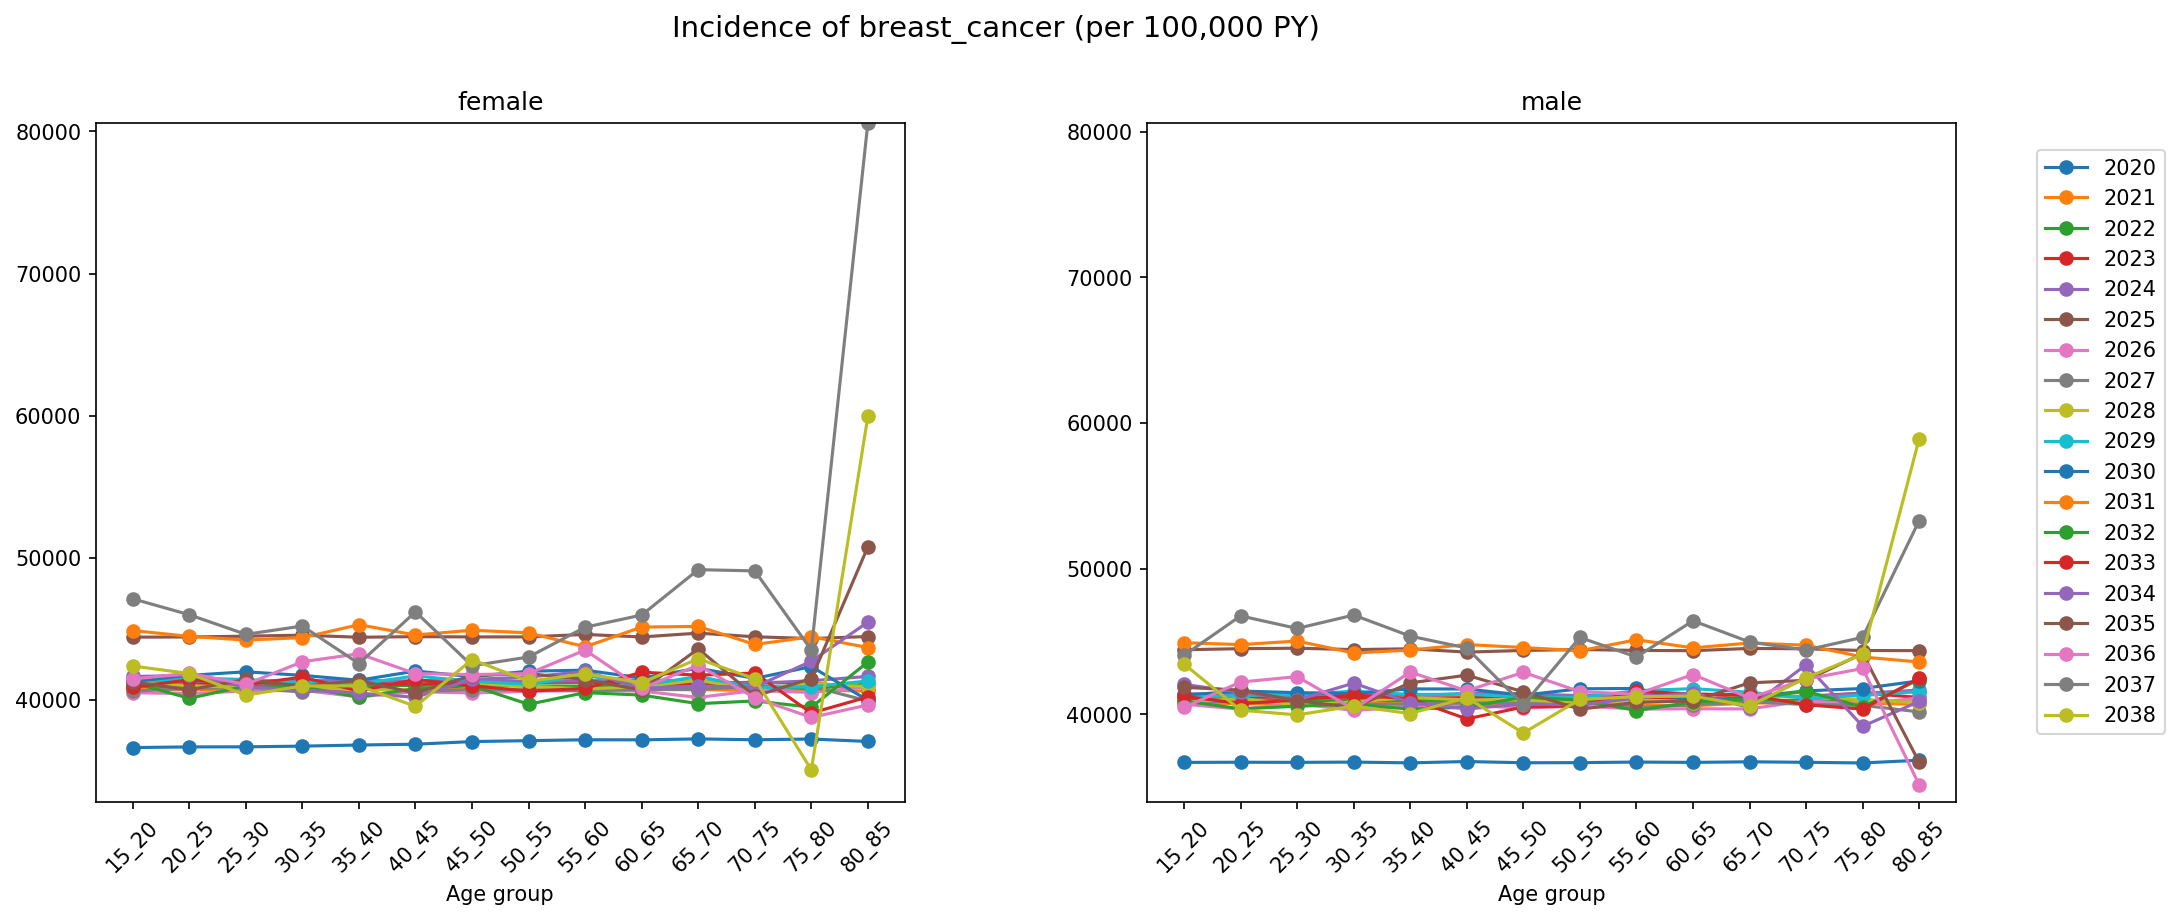

In [23]:
plot_over_age(incidence_rate_summary, 'Incidence', 'measure', 'breast_carcinoma_in_situ_to_breast_cancer_event_count')

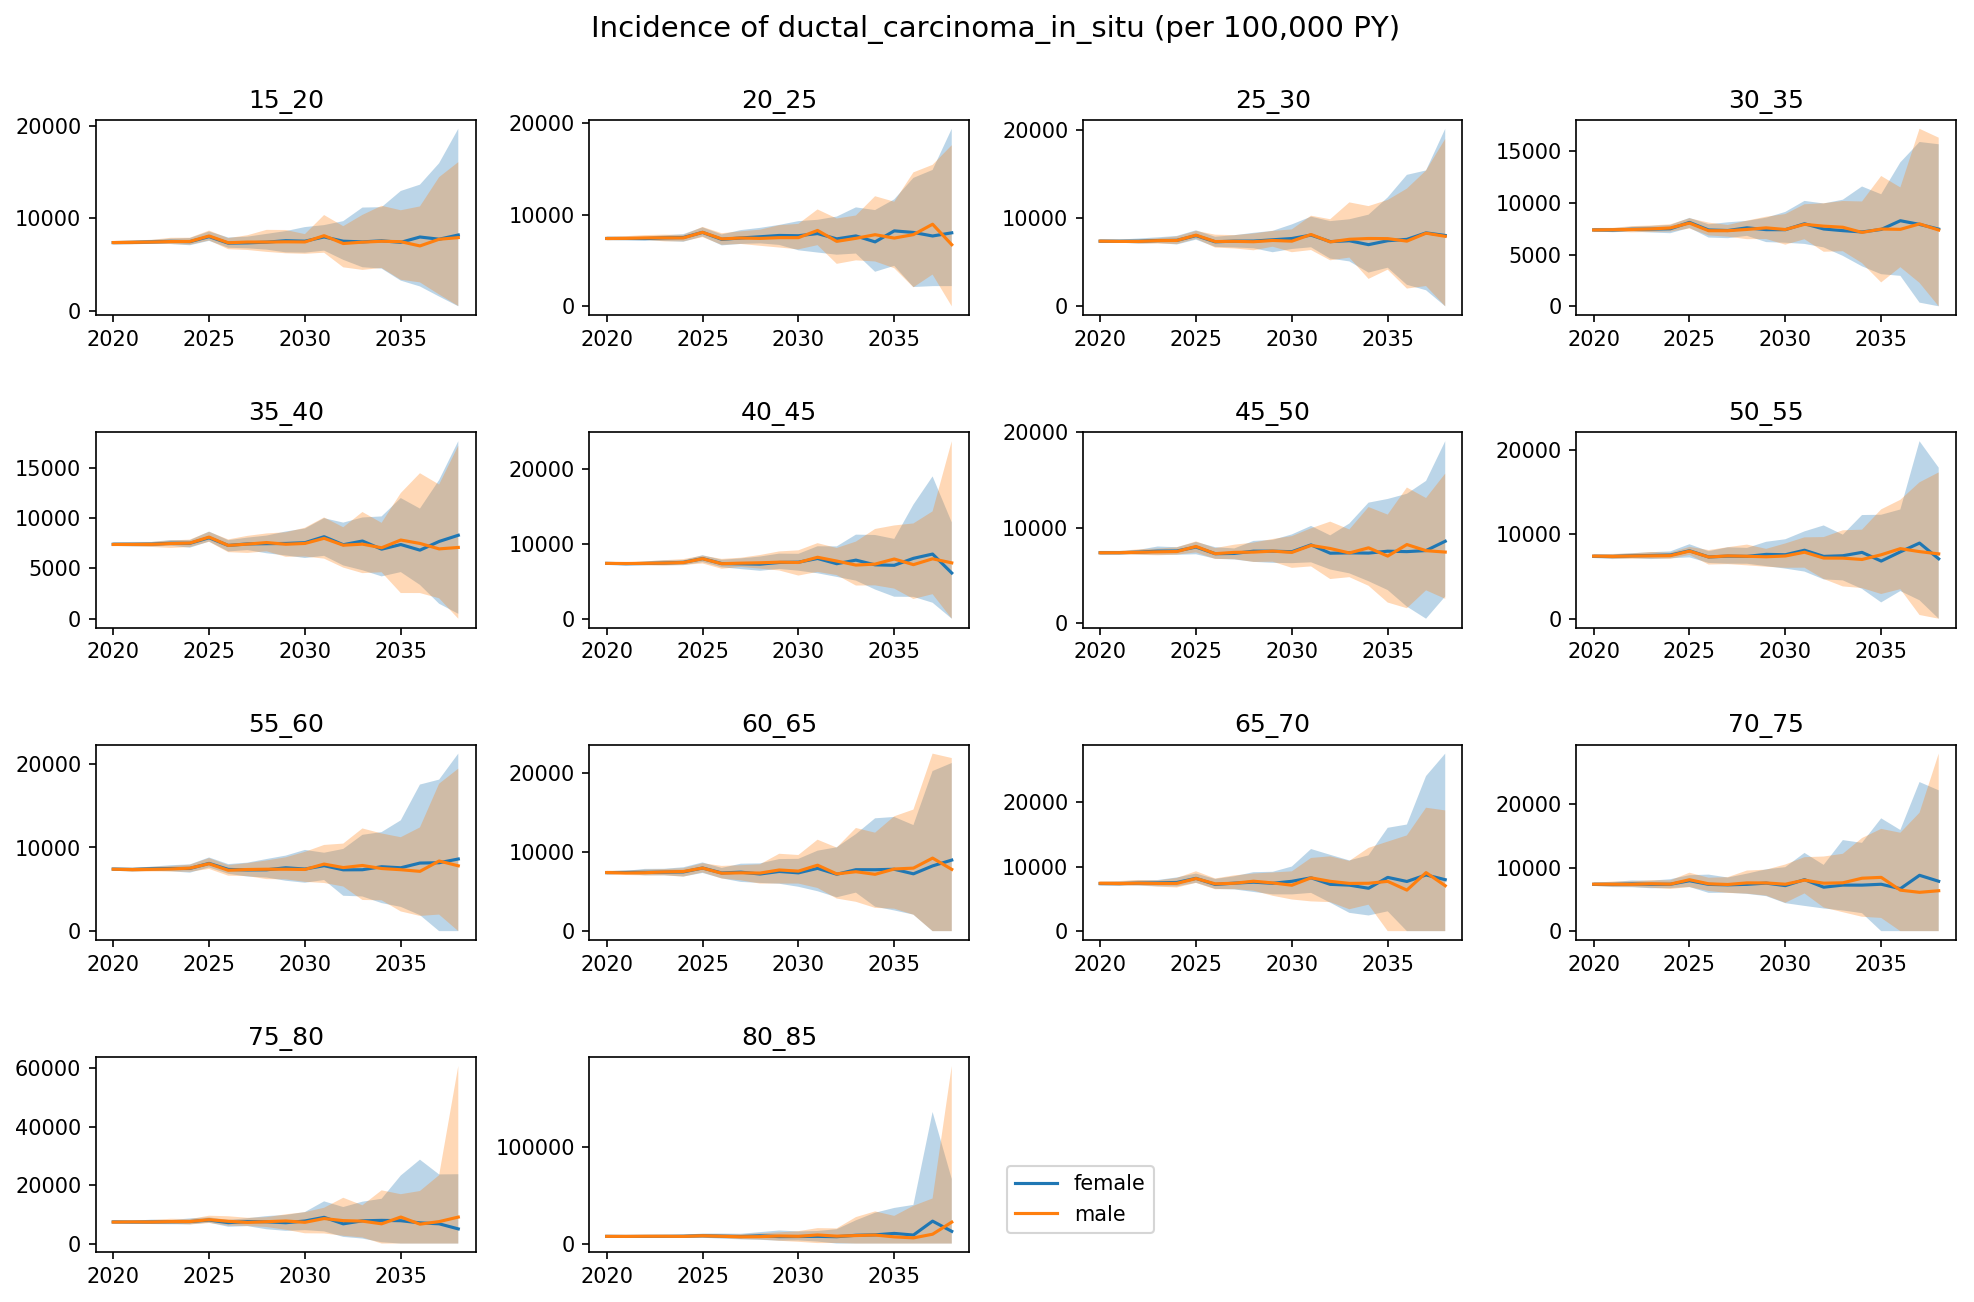

In [24]:
plot_over_year(incidence_rate_summary, 'Incidence', 'measure', 'susceptible_to_breast_cancer_to_ductal_carcinoma_in_situ_event_count')

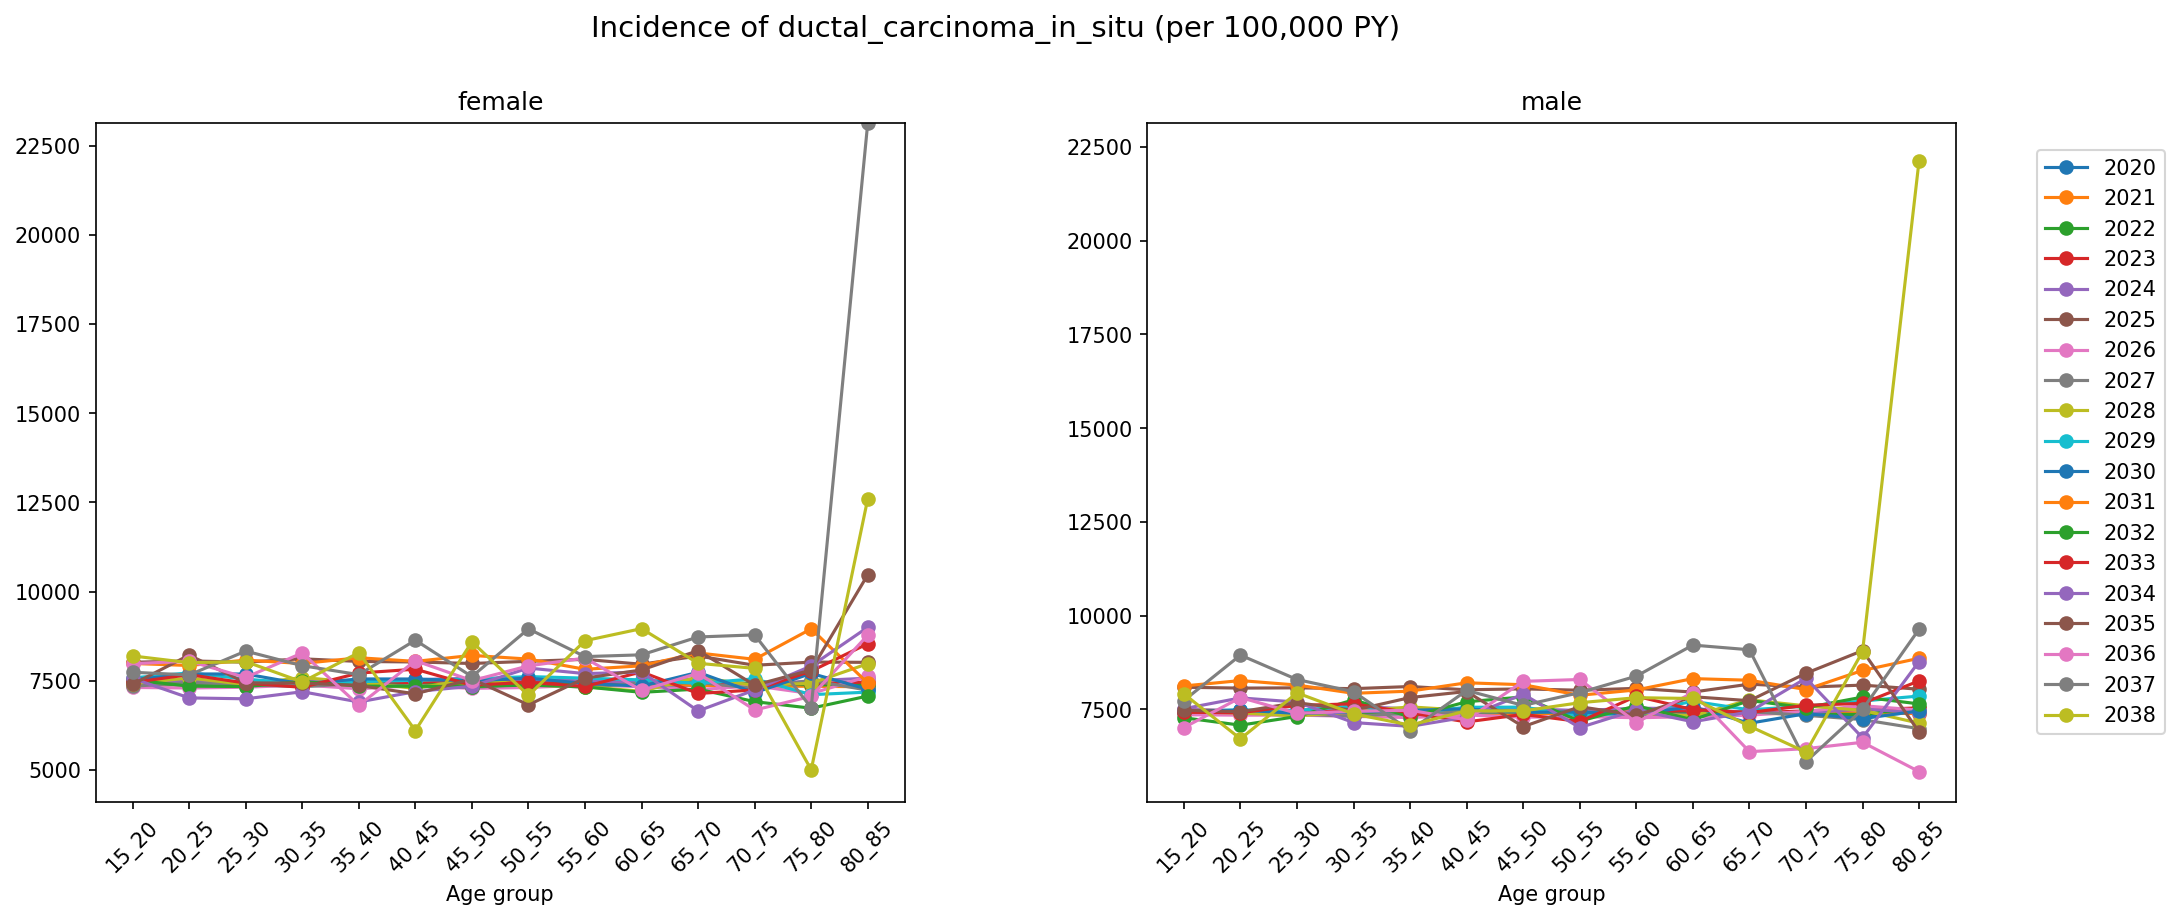

In [25]:
plot_over_age(incidence_rate_summary, 'Incidence', 'measure', 'susceptible_to_breast_cancer_to_ductal_carcinoma_in_situ_event_count')

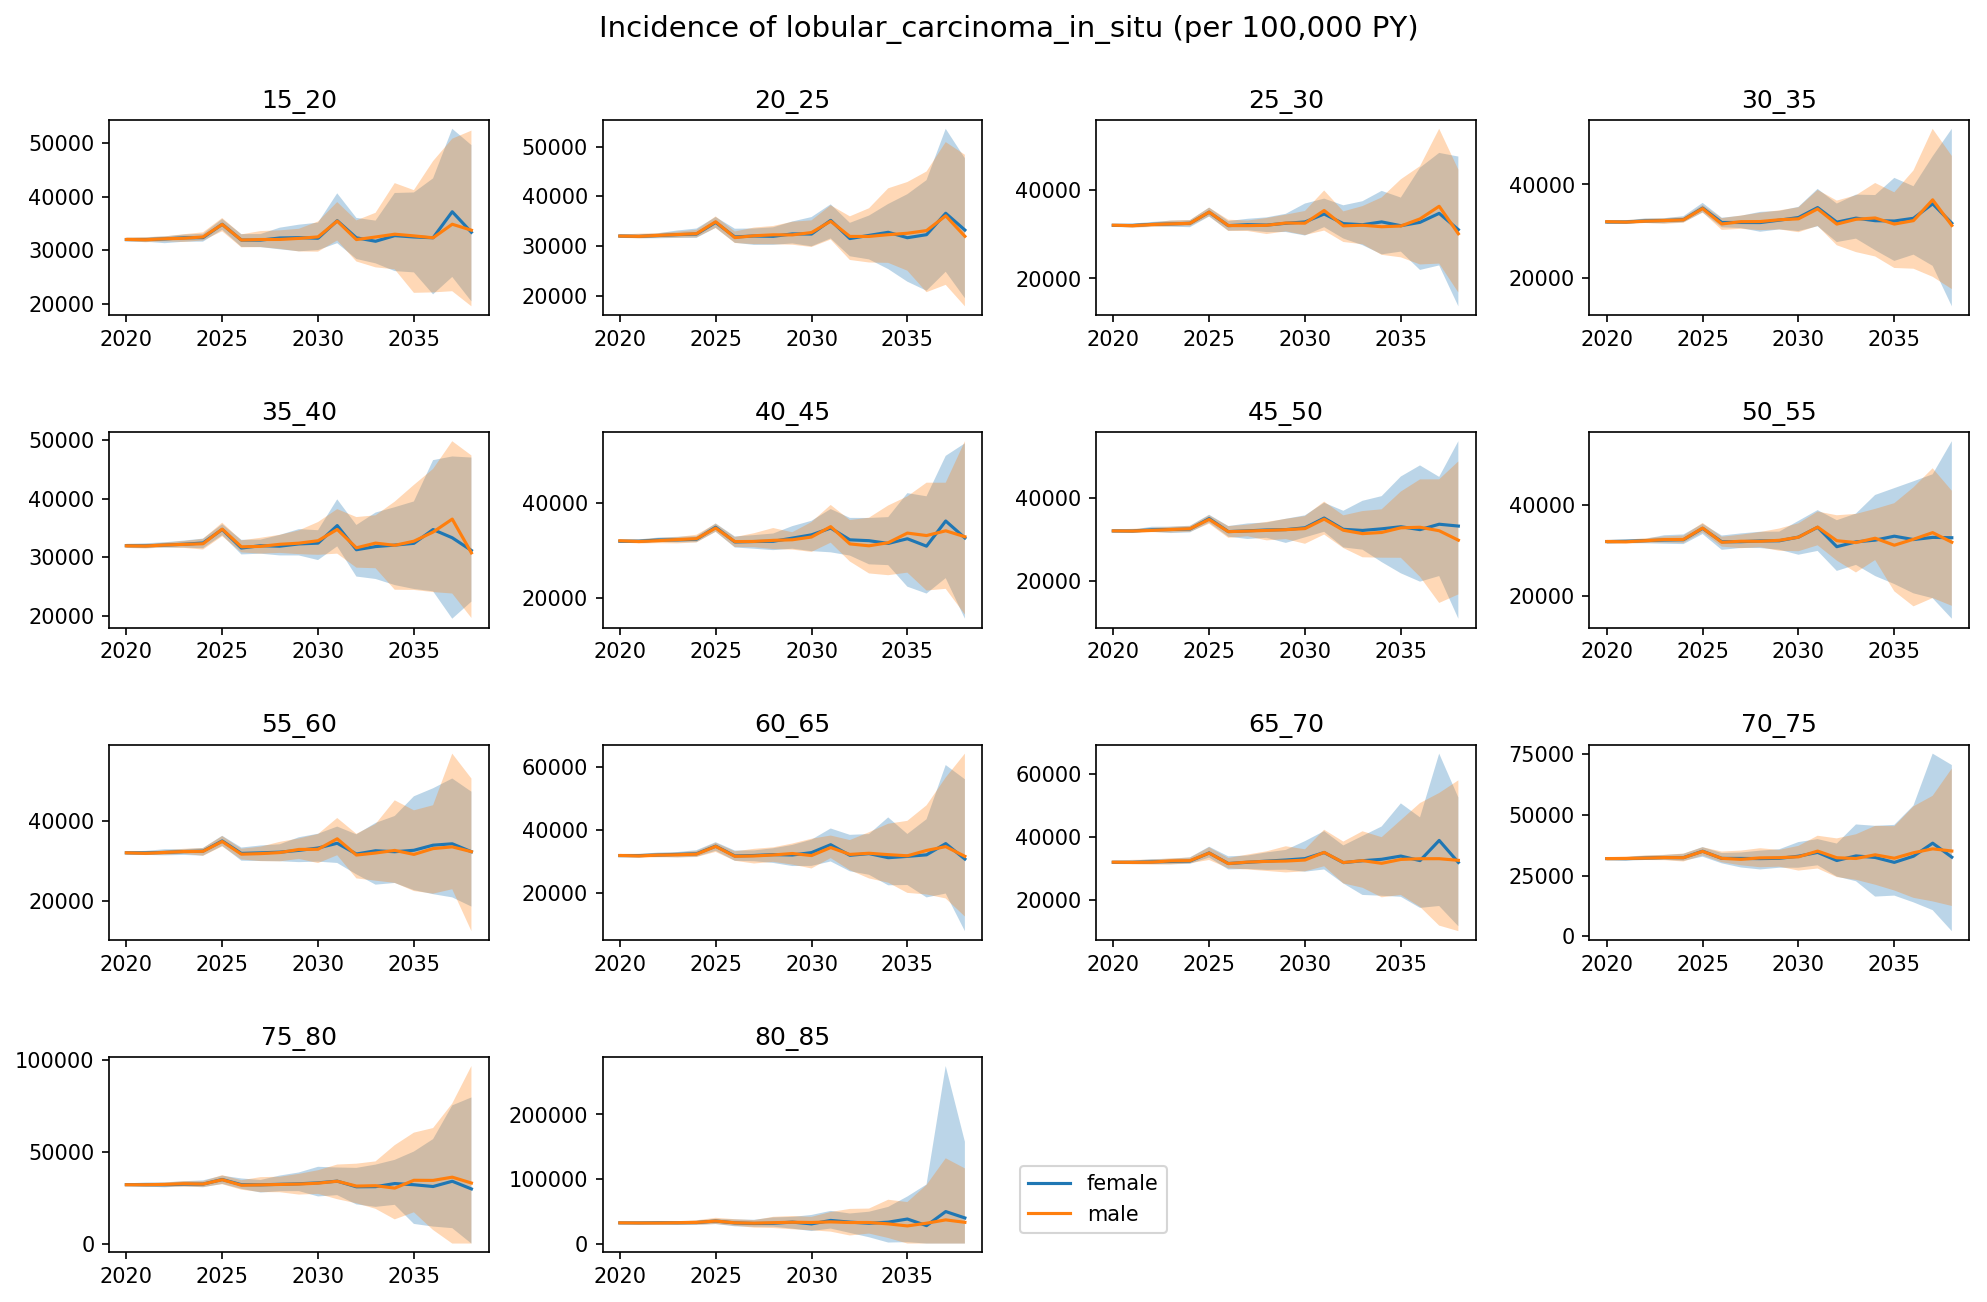

In [26]:
plot_over_year(incidence_rate_summary, 'Incidence', 'measure', 'susceptible_to_breast_cancer_to_lobular_carcinoma_in_situ_event_count')

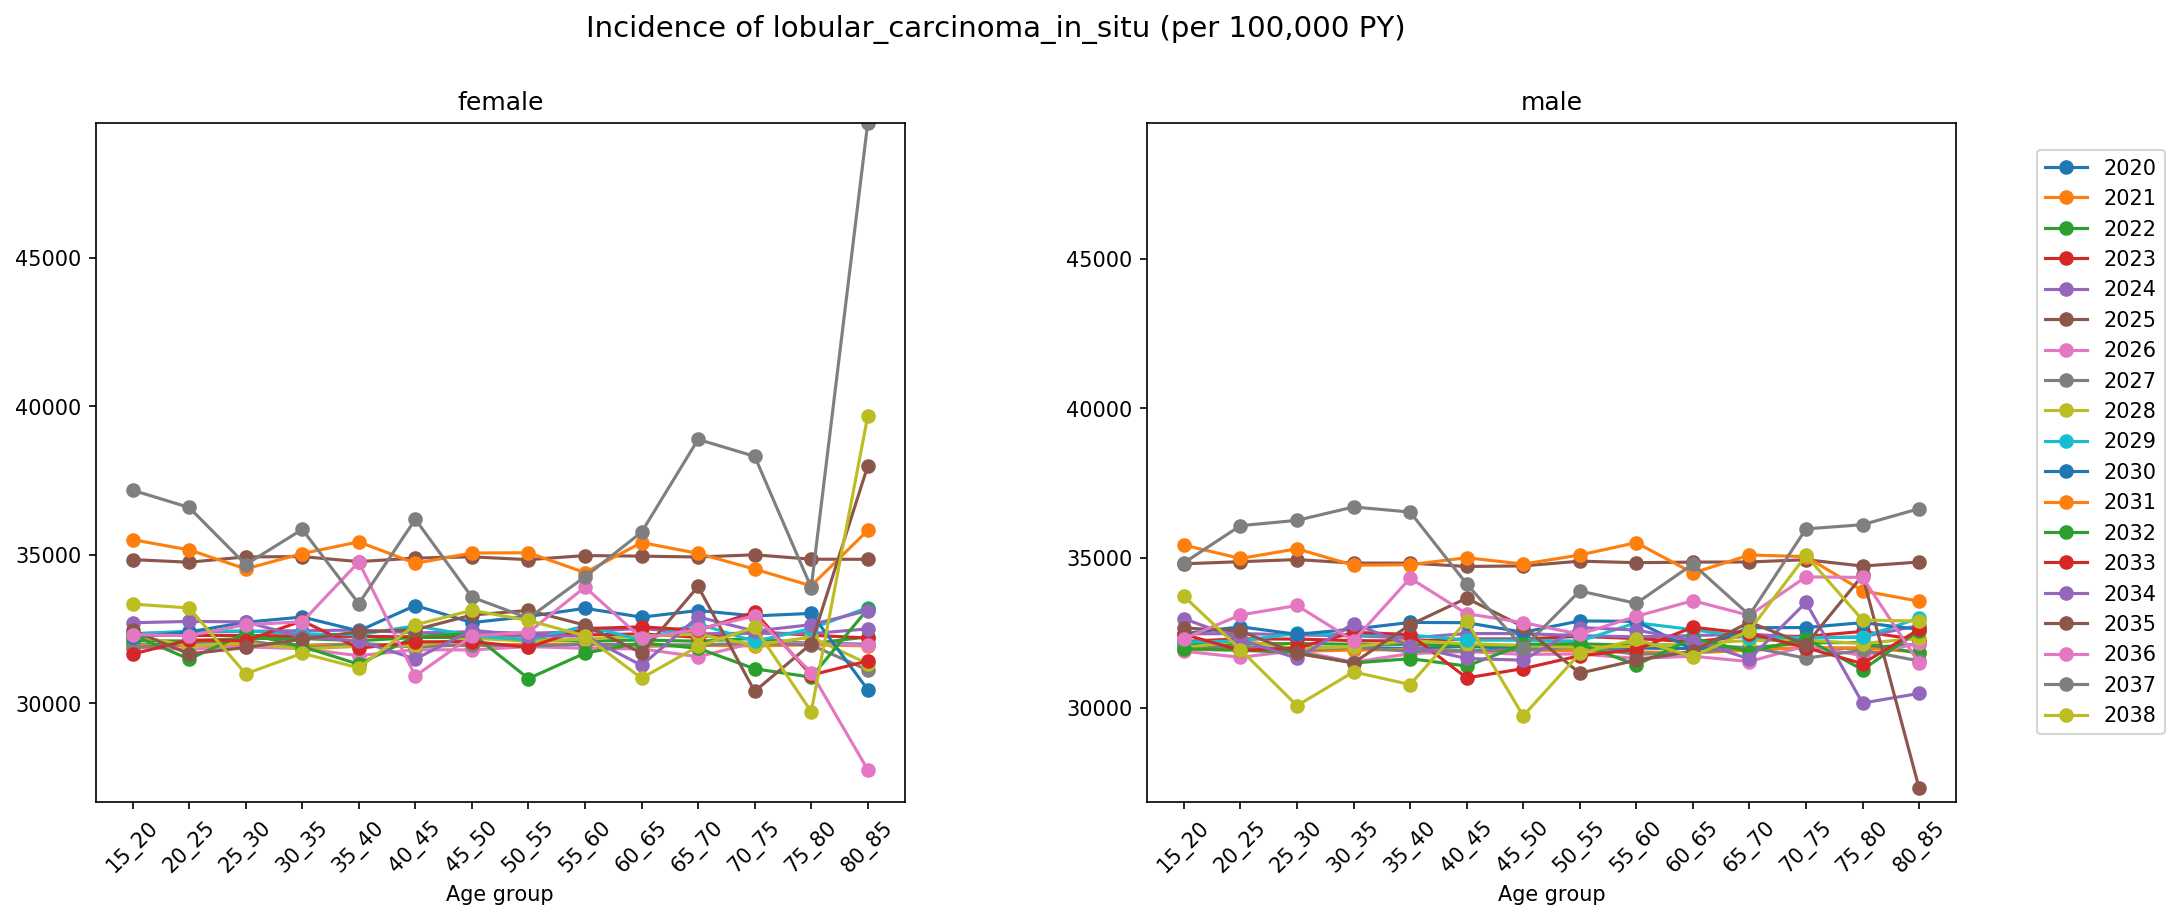

In [27]:
plot_over_age(incidence_rate_summary, 'Incidence', 'measure', 'susceptible_to_breast_cancer_to_lobular_carcinoma_in_situ_event_count')

# Prevalence

In [28]:
state_person_time = df['state_person_time.csv'].loc[
    df['state_person_time.csv'].cause.isin(['breast_cancer', 'ductal_carcinoma_in_situ', 'lobular_carcinoma_in_situ'])
]
state_person_time

sex  year                      cause  input_draw        value  \
0       female  2020              breast_cancer           3  2942.258727   
1       female  2020              breast_cancer           3  2956.468172   
2       female  2020              breast_cancer           3  2932.073922   
3       female  2020              breast_cancer           3  2985.544148   
...        ...   ...                        ...         ...          ...   
105696    male  2038  lobular_carcinoma_in_situ         990     0.164271   
105697    male  2038  lobular_carcinoma_in_situ         990     0.246407   
105698    male  2038  lobular_carcinoma_in_situ         990     0.164271   
105699    male  2038  lobular_carcinoma_in_situ         990     0.000000   

       age_cohort            measure  
0           15_20  state_person_time  
1           20_25  state_person_time  
2           25_30  state_person_time  
3           30_35  state_person_time  
...           ...                ...  
105696      65_70  state_person_time  
105697      70_75  state_person_time  
105698      75_80  state_person_time  
105699      80_85  state_person_time  

[79800 rows x 7 columns]

In [29]:
prevalence = (state_person_time.drop(columns='measure').set_index([c for c in cols if c != 'measure'])
              .div(df['person_time.csv'].drop(columns='measure').set_index([c for c in cols if c not in ['cause', 'measure']]))
              .mul(100)
              .reset_index())
prevalence

age_cohort     sex  year  input_draw                      cause  \
0          15_20  female  2020           3              breast_cancer   
1          15_20  female  2020           3   ductal_carcinoma_in_situ   
2          15_20  female  2020           3  lobular_carcinoma_in_situ   
3          15_20  female  2020          21              breast_cancer   
...          ...     ...   ...         ...                        ...   
79796      80_85    male  2038         973  lobular_carcinoma_in_situ   
79797      80_85    male  2038         990              breast_cancer   
79798      80_85    male  2038         990   ductal_carcinoma_in_situ   
79799      80_85    male  2038         990  lobular_carcinoma_in_situ   

          value  
0      3.241766  
1      0.604426  
2      2.601322  
3      3.264802  
...         ...  
79796  0.000000  
79797  2.158273  
79798  2.158273  
79799  0.000000  

[79800 rows x 6 columns]

In [30]:
prevalence_summary = (prevalence
                      .groupby([c for c in cols if c not in ['input_draw', 'measure']])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
prevalence_summary

age_cohort     sex  year                      cause      mean      2.5%  \
0         15_20  female  2020              breast_cancer  3.269434  3.241968   
1         15_20  female  2020   ductal_carcinoma_in_situ  0.605393  0.591038   
2         15_20  female  2020  lobular_carcinoma_in_situ  2.625478  2.601679   
3         15_20  female  2021              breast_cancer  3.672988  3.633691   
...         ...     ...   ...                        ...       ...       ...   
1592      80_85    male  2037  lobular_carcinoma_in_situ  3.010054  0.000000   
1593      80_85    male  2038              breast_cancer  5.120800  0.000000   
1594      80_85    male  2038   ductal_carcinoma_in_situ  1.818088  0.000000   
1595      80_85    male  2038  lobular_carcinoma_in_situ  2.701550  0.000000   

          97.5%  
0      3.293127  
1      0.619577  
2      2.654382  
3      3.715784  
...         ...  
1592  10.849893  
1593  21.109756  
1594  15.063910  
1595   9.563204  

[1596 rows x 7 columns]

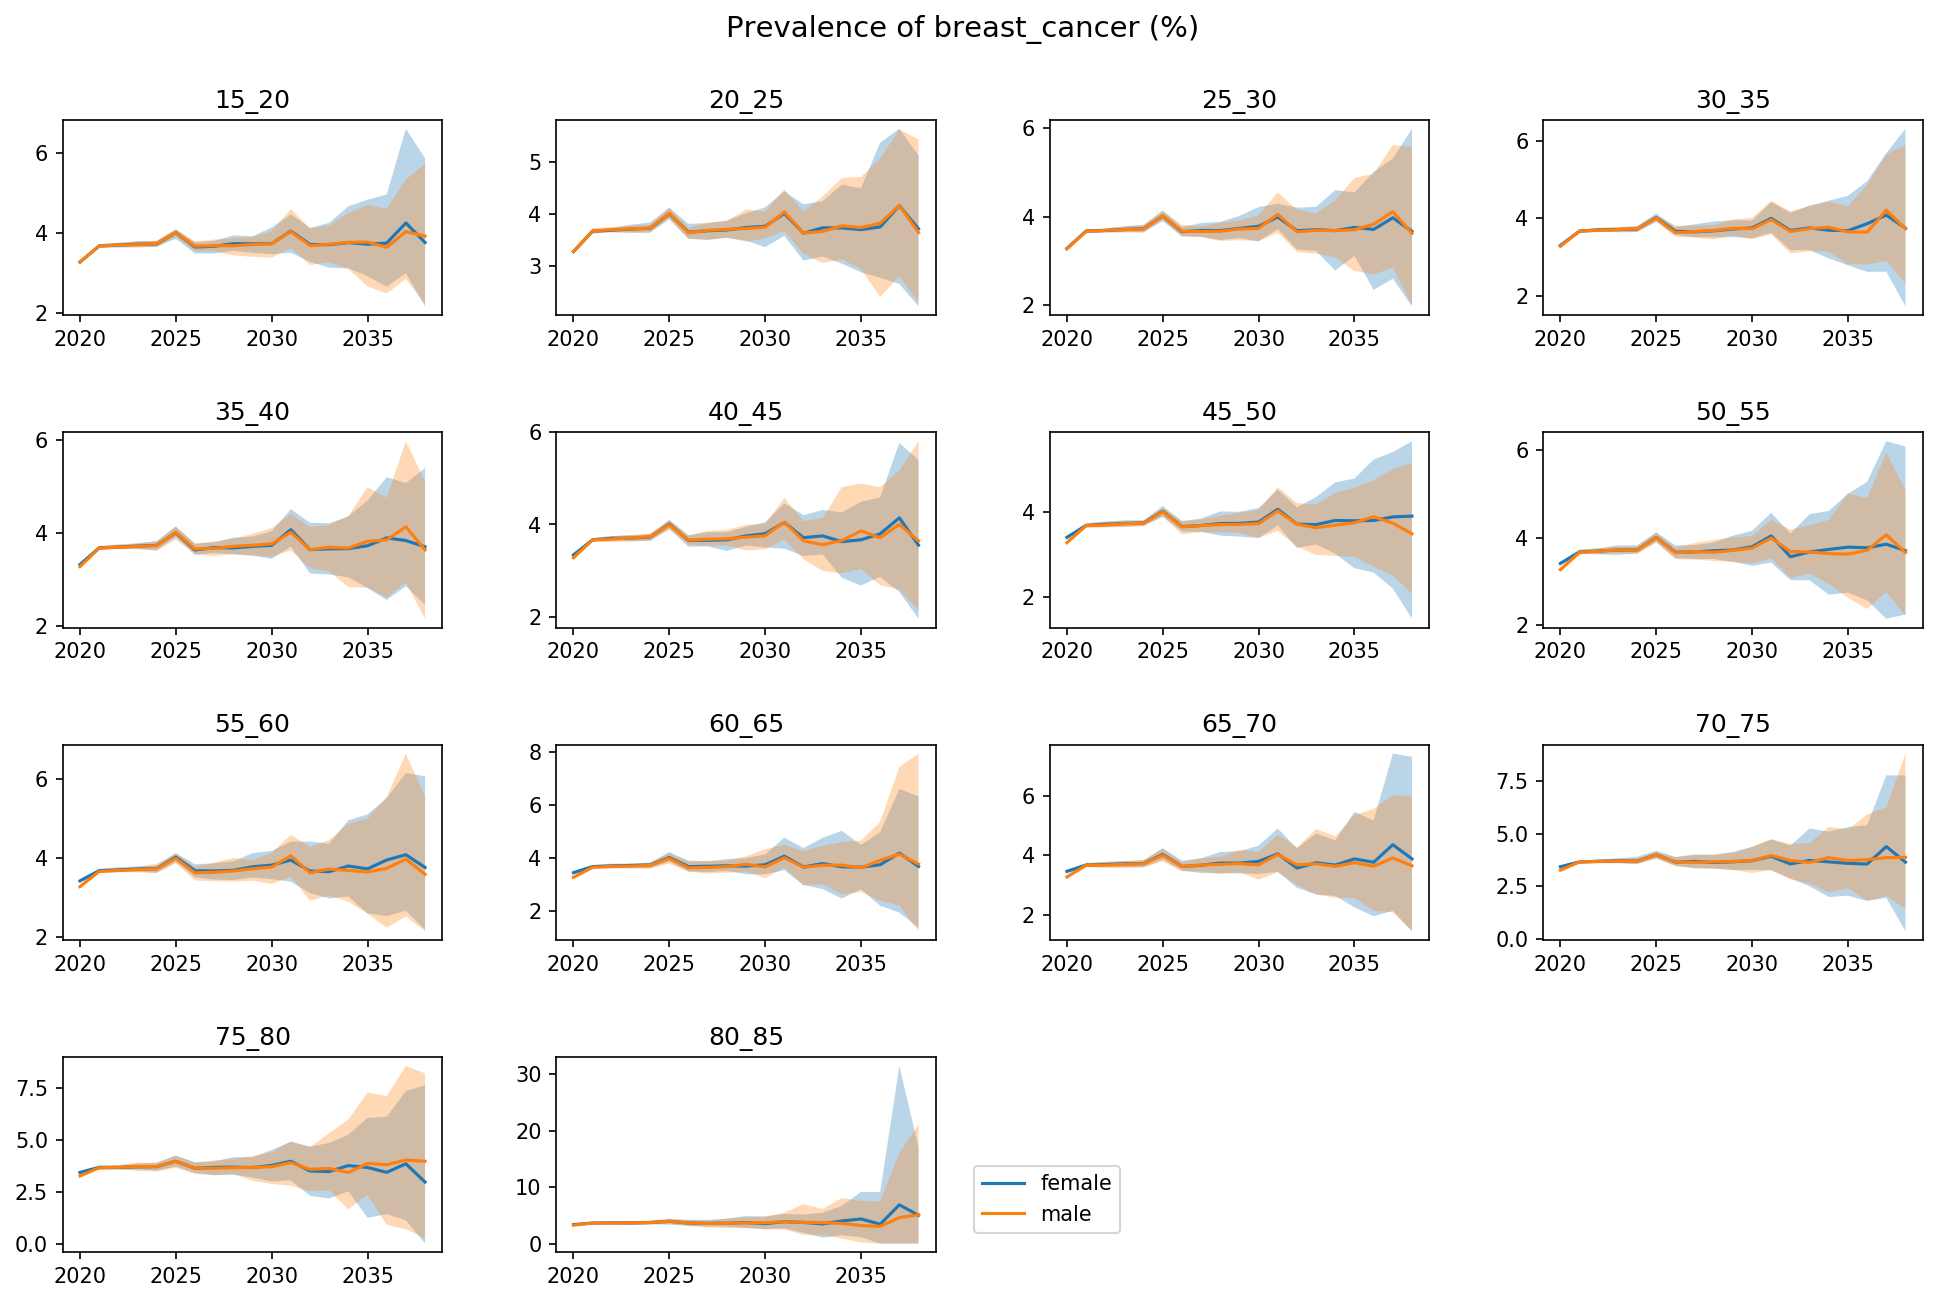

In [31]:
plot_over_year(prevalence_summary, 'Prevalence', 'cause', 'breast_cancer')

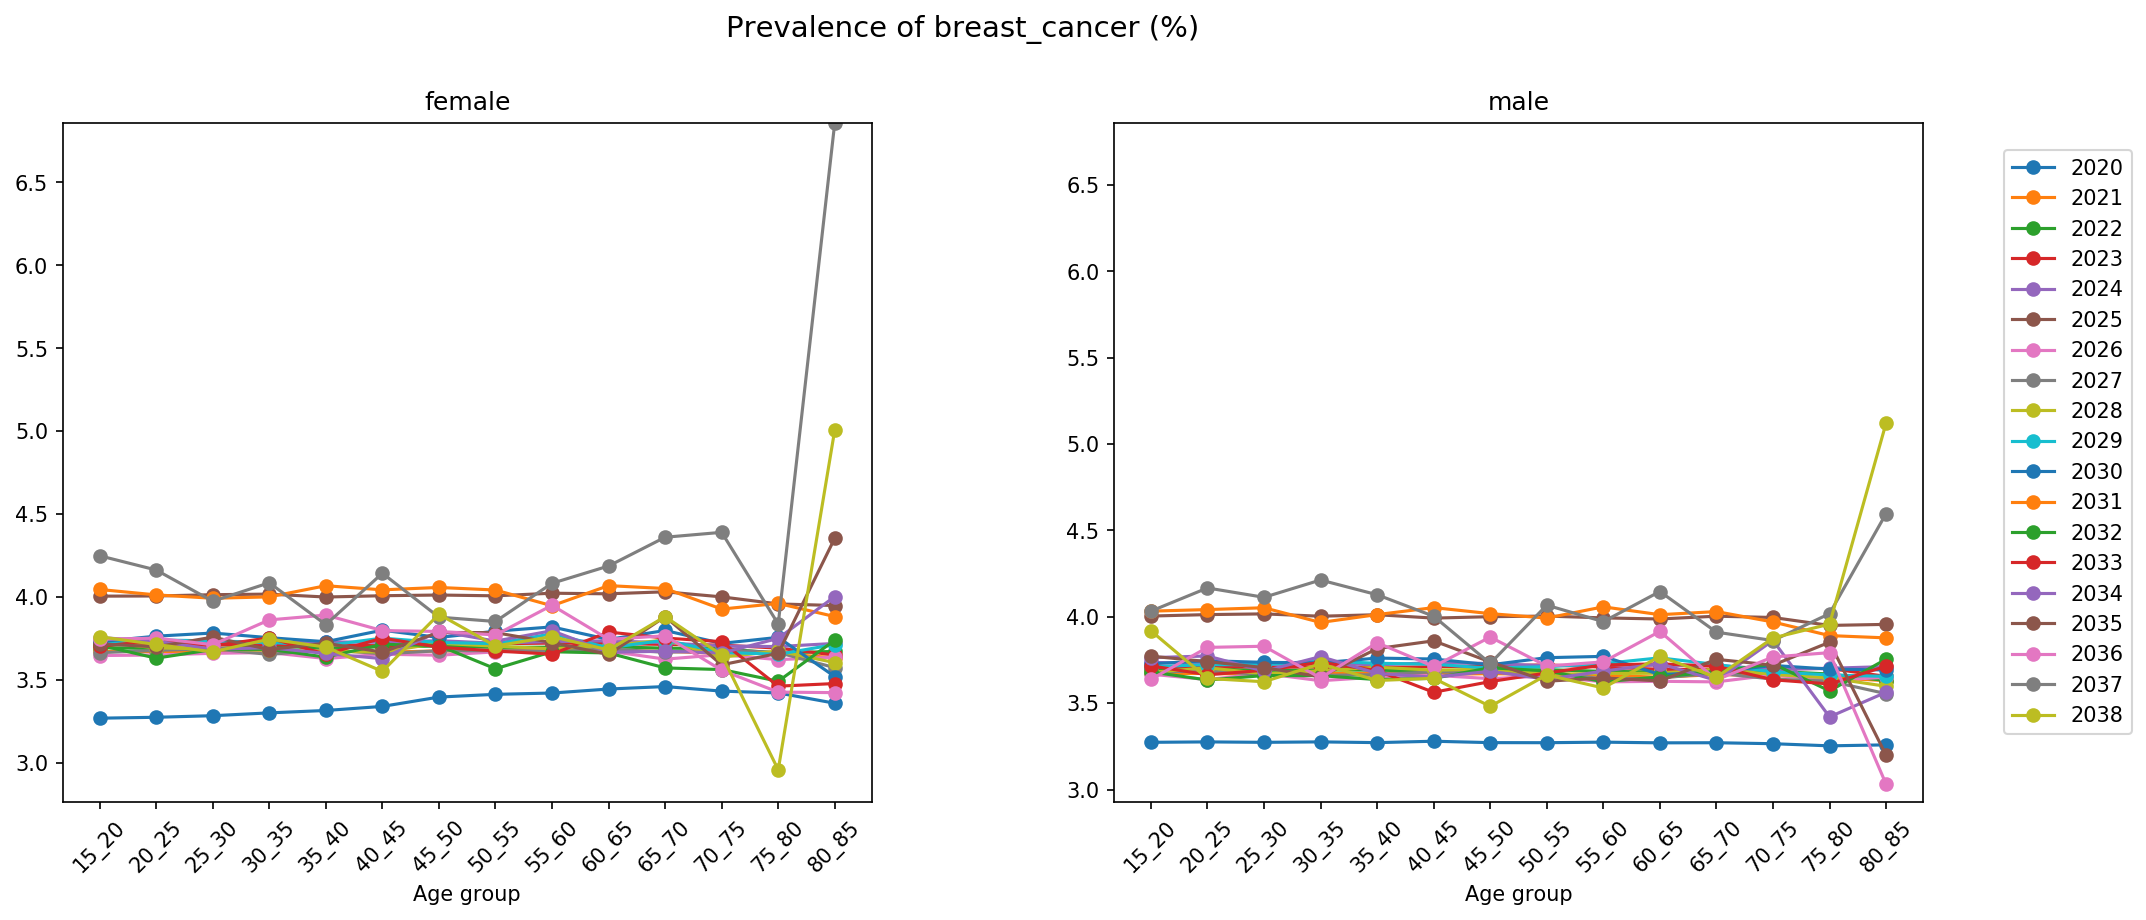

In [32]:
plot_over_age(prevalence_summary, 'Prevalence', 'cause', 'breast_cancer')

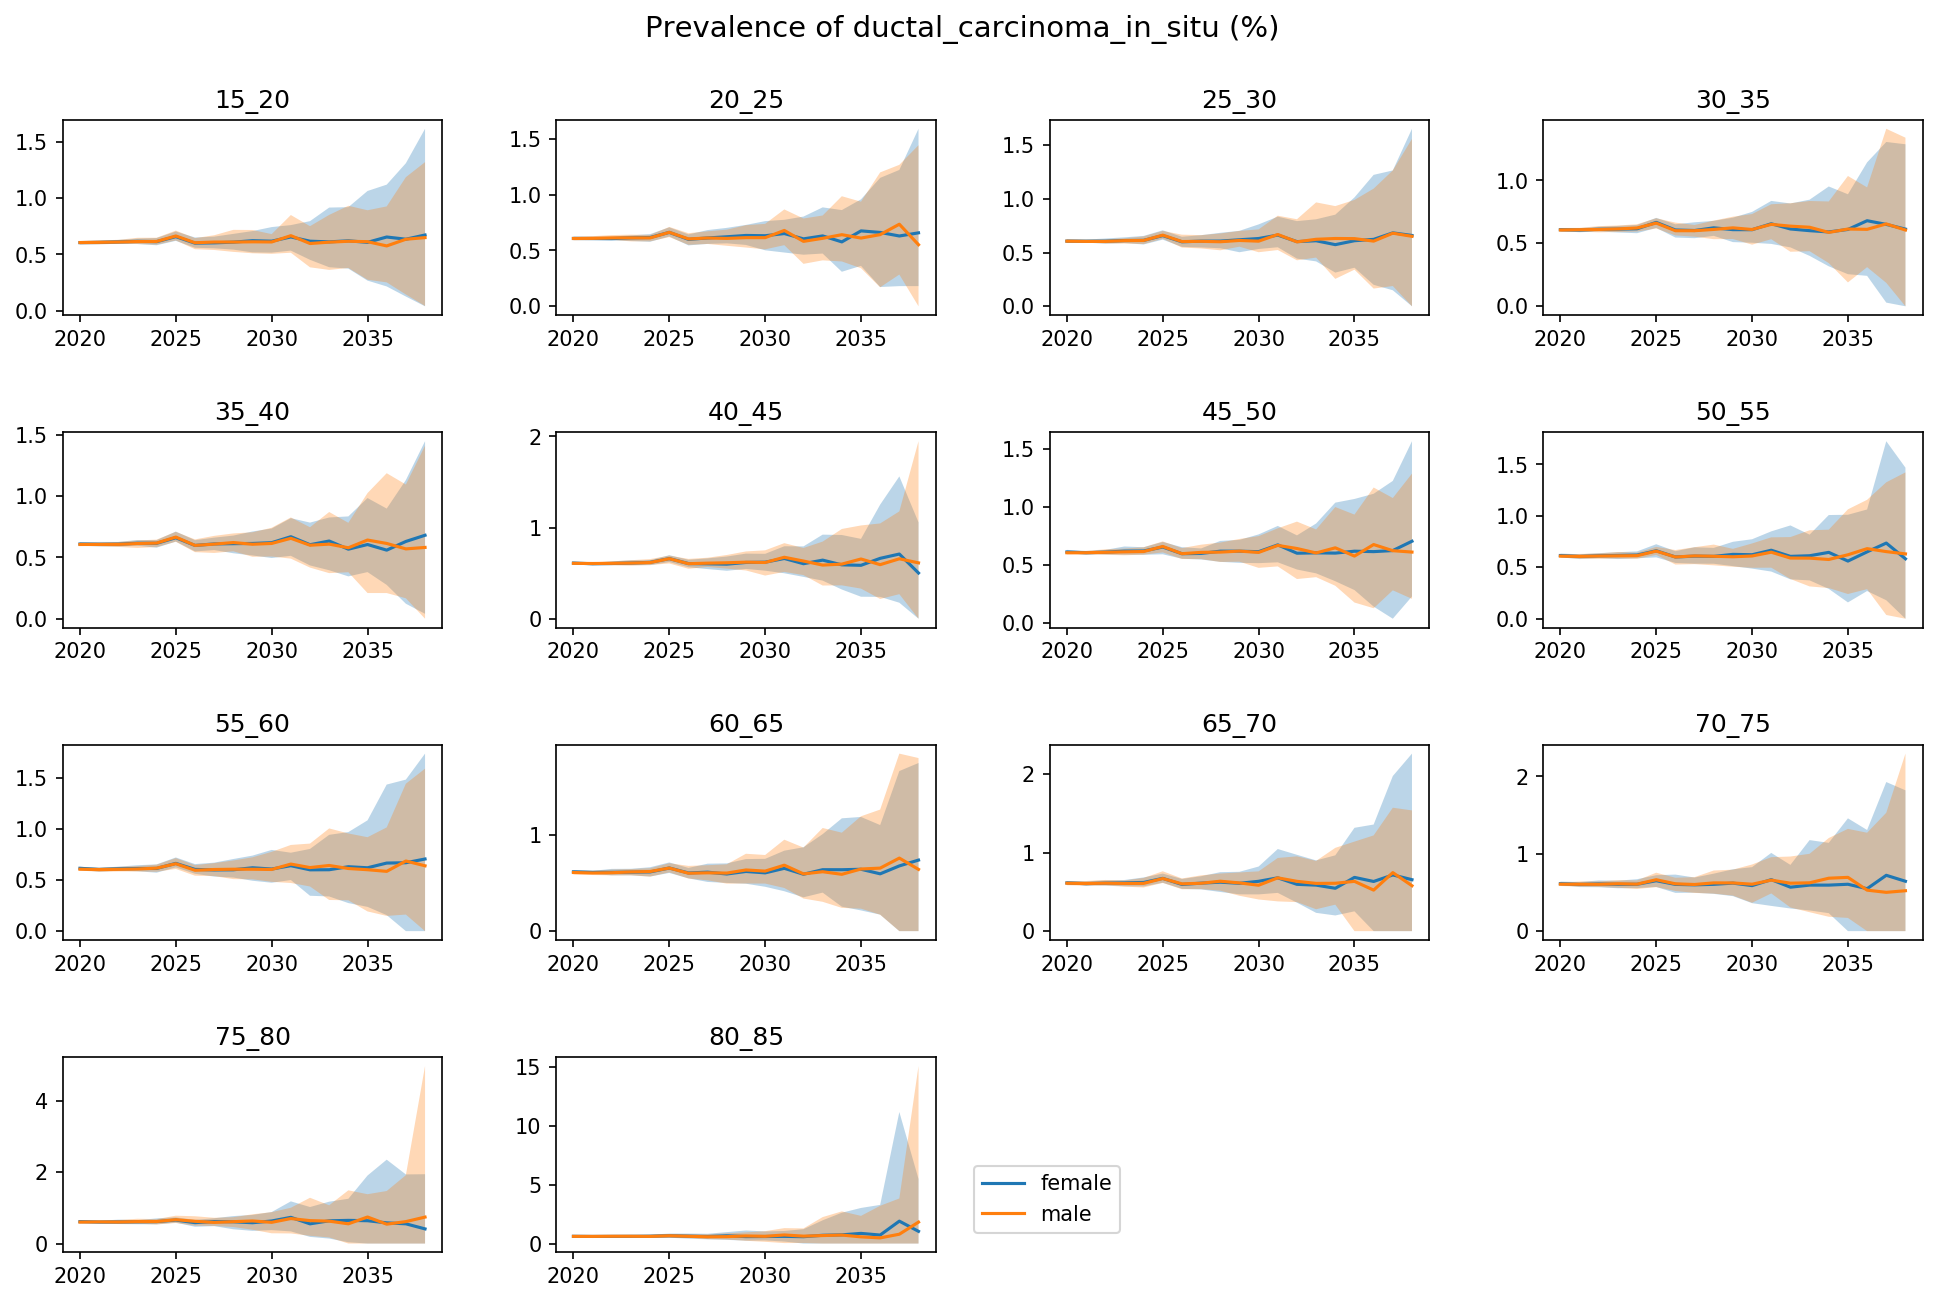

In [33]:
plot_over_year(prevalence_summary, 'Prevalence', 'cause', 'ductal_carcinoma_in_situ')

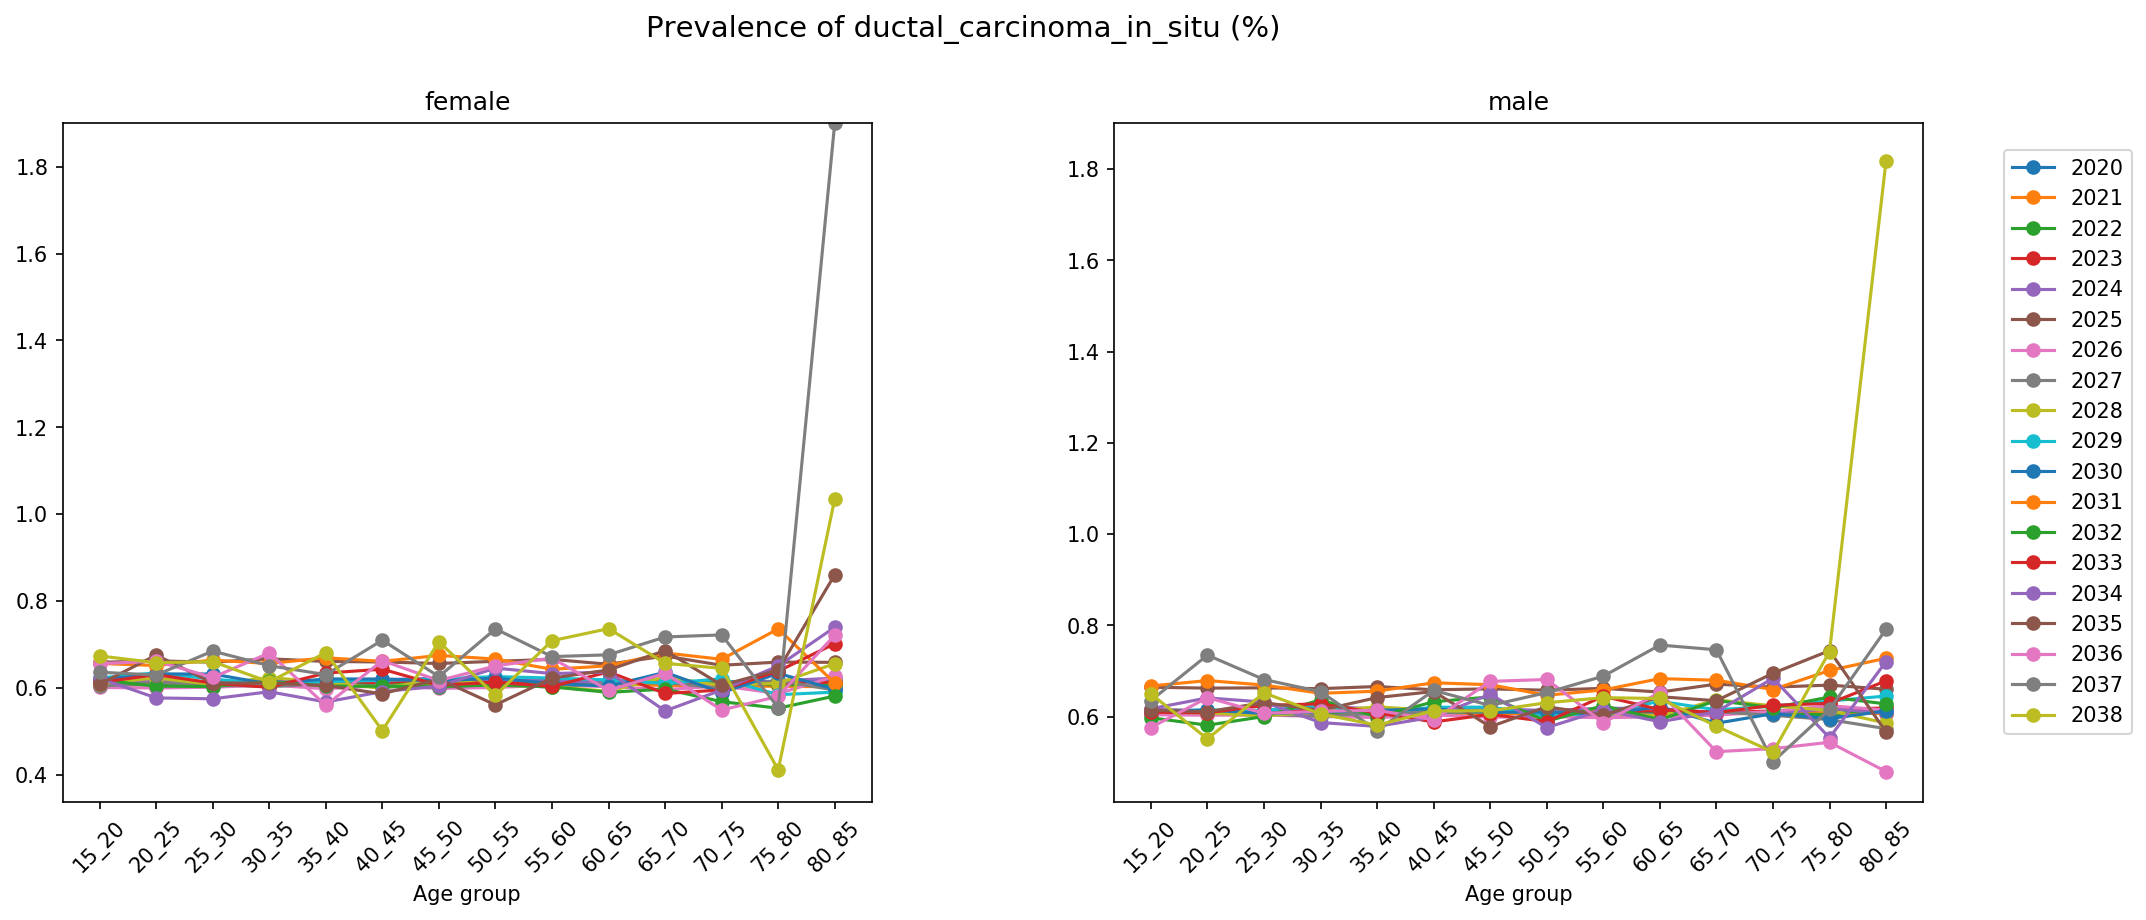

In [34]:
plot_over_age(prevalence_summary, 'Prevalence', 'cause', 'ductal_carcinoma_in_situ')

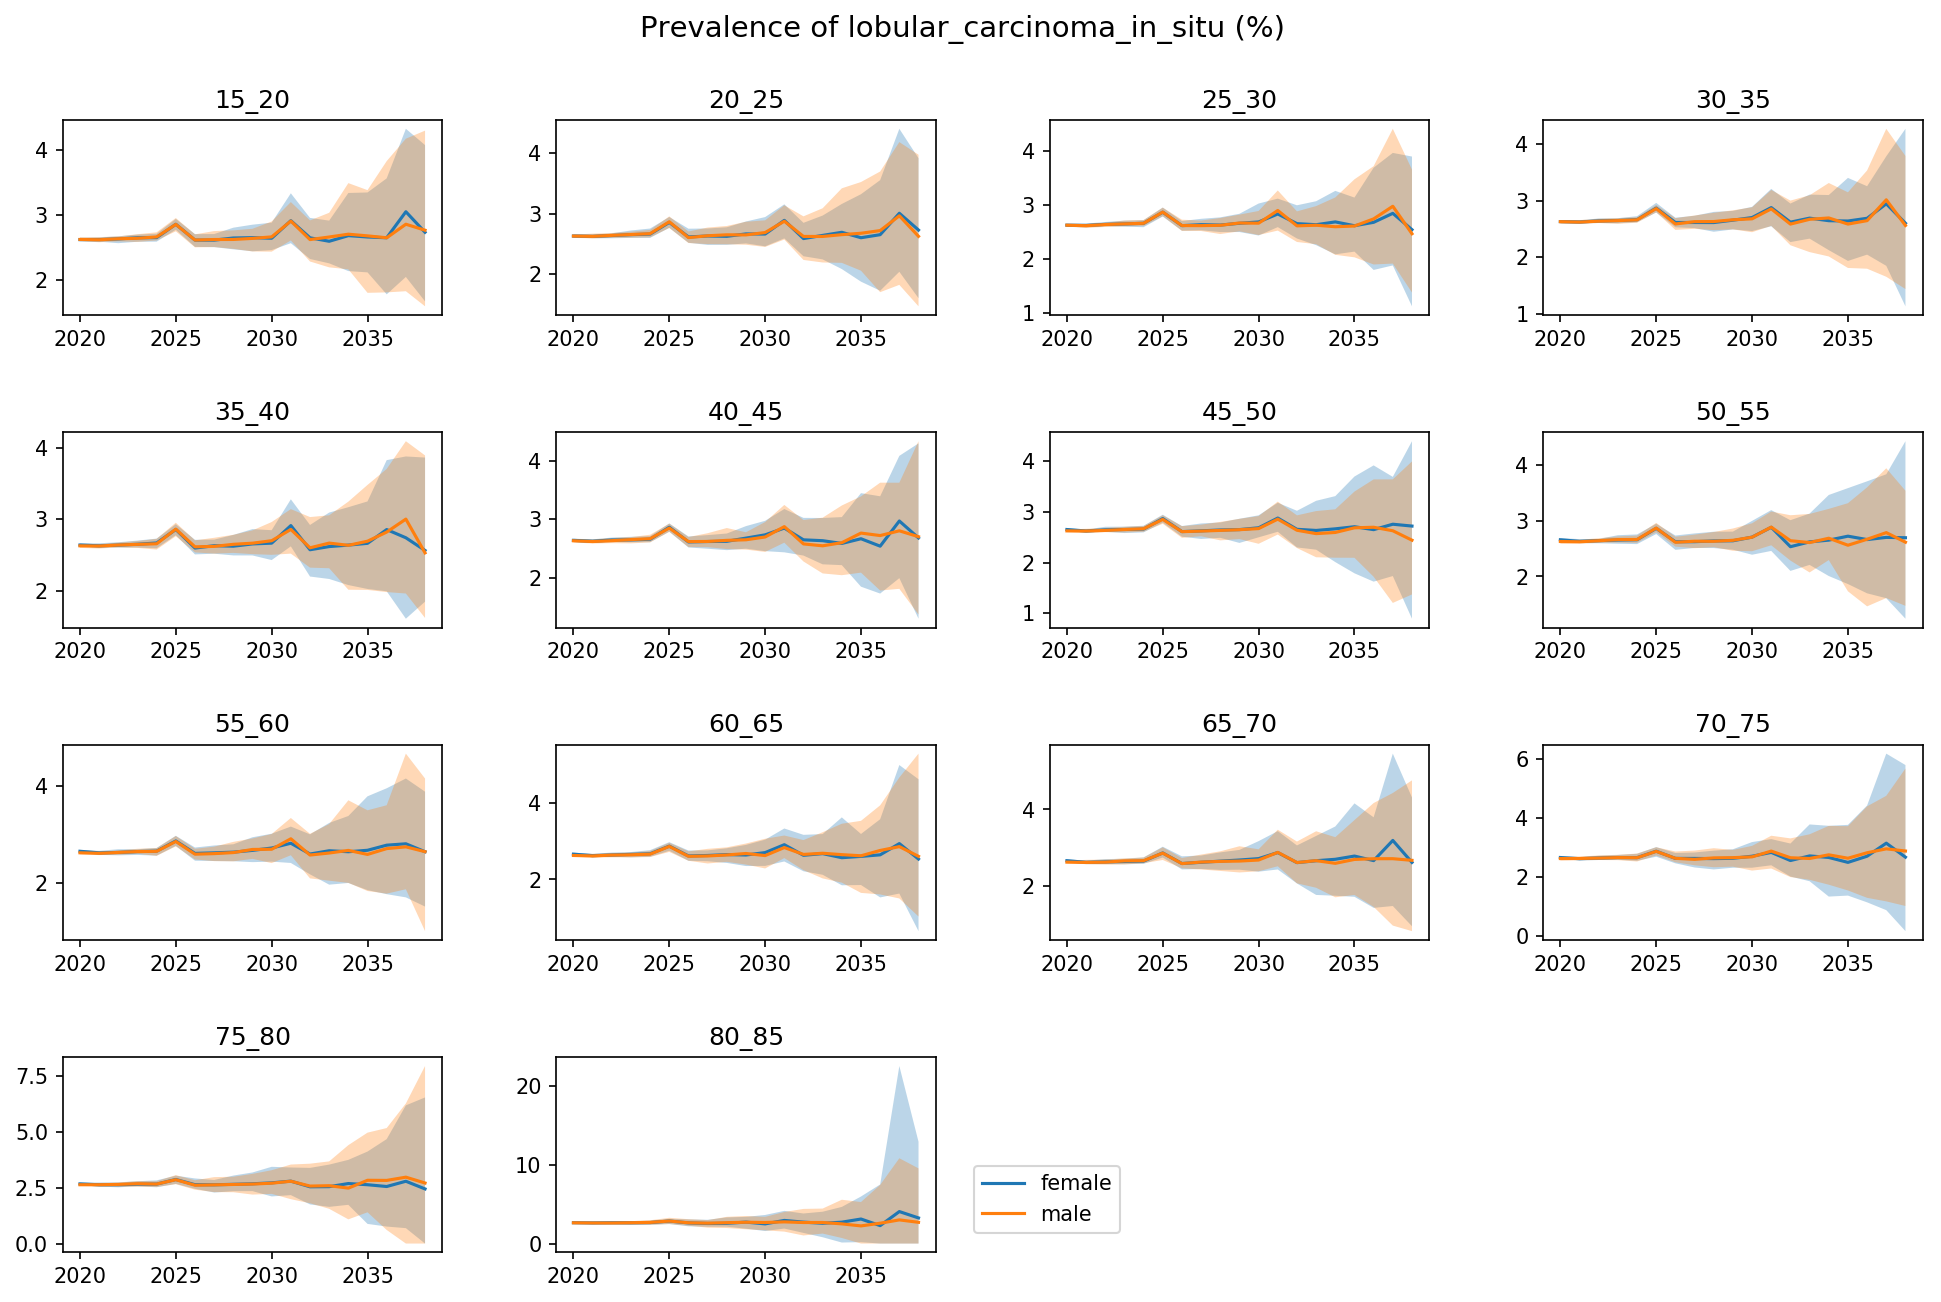

In [35]:
plot_over_year(prevalence_summary, 'Prevalence', 'cause', 'lobular_carcinoma_in_situ')

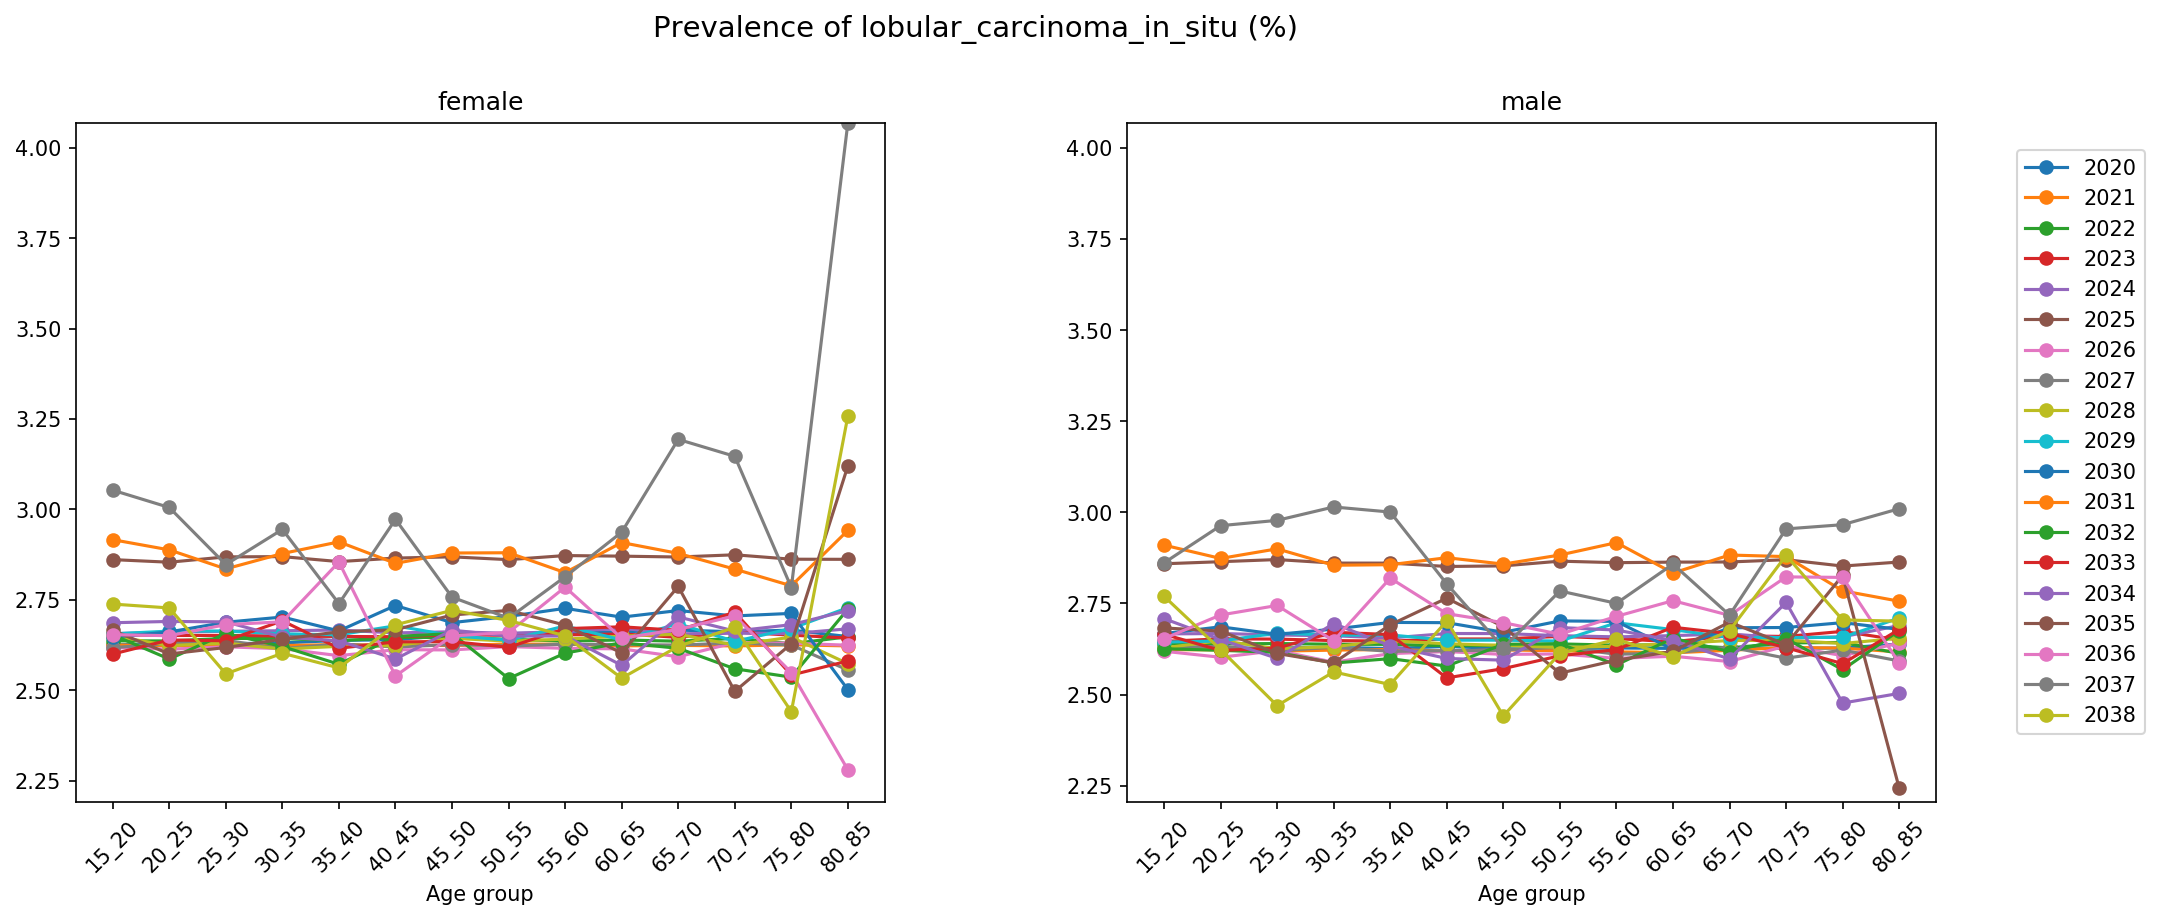

In [36]:
plot_over_age(prevalence_summary, 'Prevalence', 'cause', 'lobular_carcinoma_in_situ')

# Forecast data

In [37]:
# change the working directory to where you pull transformed forecast data
%cd C:/Users/yongqx2/Desktop/Sim Science/Swiss RE Cancer/forecasts
#%cd /ihme/costeffectiveness/vivarium_csu_cancer

C:\Users\yongqx2\Desktop\Sim Science\Swiss RE Cancer\forecasts


In [38]:
forecast_names = glob.glob('*forecast*.csv')
forecast = {}
for forecast_name in forecast_names:
    forecast[forecast_name] = (pd.read_csv(forecast_name)
                                 .drop(columns=['location', 'age_group_id', 'sex_id'])
                                 .rename(columns={'year_id': 'year'}))

In [39]:
forecast.keys()

dict_keys(['acmr_forecast.csv', 'c429_csmr_forecast.csv', 'c429_incidence_forecast.csv', 'c429_prev_forecast.csv'])

In [40]:
forecast['c429_prev_forecast.csv'][['mean', 'lb', 'ub']] *= 100

In [41]:
forecast['c429_prev_forecast.csv']

year       age     sex      mean        lb        ub
0    2020  15 to 19    male  0.000478  0.000456  0.000505
1    2020  15 to 19  female  0.002590  0.002420  0.002800
2    2020  20 to 24    male  0.000535  0.000516  0.000561
3    2020  20 to 24  female  0.012233  0.011445  0.013236
..    ...       ...     ...       ...       ...       ...
676  2039  90 to 94    male  0.018935  0.012648  0.028938
677  2039  90 to 94  female  0.934993  0.711548  1.270134
678  2039   95 plus    male  0.006100  0.004280  0.008830
679  2039   95 plus  female  0.382218  0.310916  0.481475

[680 rows x 6 columns]

In [42]:
age_names = {
    '15 to 19': '15_20',
    '20 to 24': '20_25',
    '25 to 29': '25_30',
    '30 to 34': '30_35',
    '35 to 39': '35_40',
    '40 to 44': '40_45',
    '45 to 49': '45_50',
    '50 to 54': '50_55',
    '55 to 59': '55_60',
    '60 to 64': '60_65',
    '65 to 69': '65_70',
    '70 to 74': '70_75',
    '75 to 79': '75_80',
    '80 to 84': '80_85',
    '85 to 89': '85_90',
    '90 to 94': '90_95',
    '95 plus': '95_plus'
}

In [43]:
def plot_sim_versus_forecast_by_year(sim: pd.DataFrame, forecast: pd.DataFrame, 
                                     measure: str, col_name: str, select: str, sex: str):
    forecast = forecast.copy()
    forecast['age_cohort'] = forecast.age.map(age_names)
    sim_sub = sim[getattr(sim, col_name) == select]
    
    plt.figure(figsize=(16, 10), dpi=150)
    
    for i, age_group in enumerate(sim_sub.age_cohort.unique()):
        plt.subplot(4, 4, i+1)
        plt.subplots_adjust(wspace=0.3, hspace=0.6)
        
        sim_age_group = sim_sub[(sim_sub.age_cohort == age_group) & (sim_sub.sex == sex)]
        forecast_age_group = forecast[(forecast.age_cohort == age_group) & (forecast.sex == sex)]
        
        plt.plot(sim_age_group['year'], sim_age_group['mean'], label=f'sim {sex}')
        plt.plot(forecast_age_group['year'], forecast_age_group['mean'], label=f'forecast {sex}')
        plt.fill_between(sim_age_group['year'], sim_age_group['2.5%'], sim_age_group['97.5%'], alpha=.3)
        plt.fill_between(forecast_age_group['year'], forecast_age_group['lb'], forecast_age_group['ub'], alpha=.3)
        plt.title(age_group)
    plt.legend(loc=(1.1, .1))
    
    if measure == 'Deaths':
        plt.suptitle(f'{measure} due to {select} (per 100,000 PY)', y=0.95, fontsize=14)
    elif measure == 'Incidence':
        if select == 'breast_carcinoma_in_situ_to_breast_cancer_event_count':
            select = 'breast_cancer'
        plt.suptitle(f'{measure} of {select} (per 100,000 PY)', y=0.95, fontsize=14)
    else:
        plt.suptitle(f'{measure} of {select} (%)', y=0.95, fontsize=14)

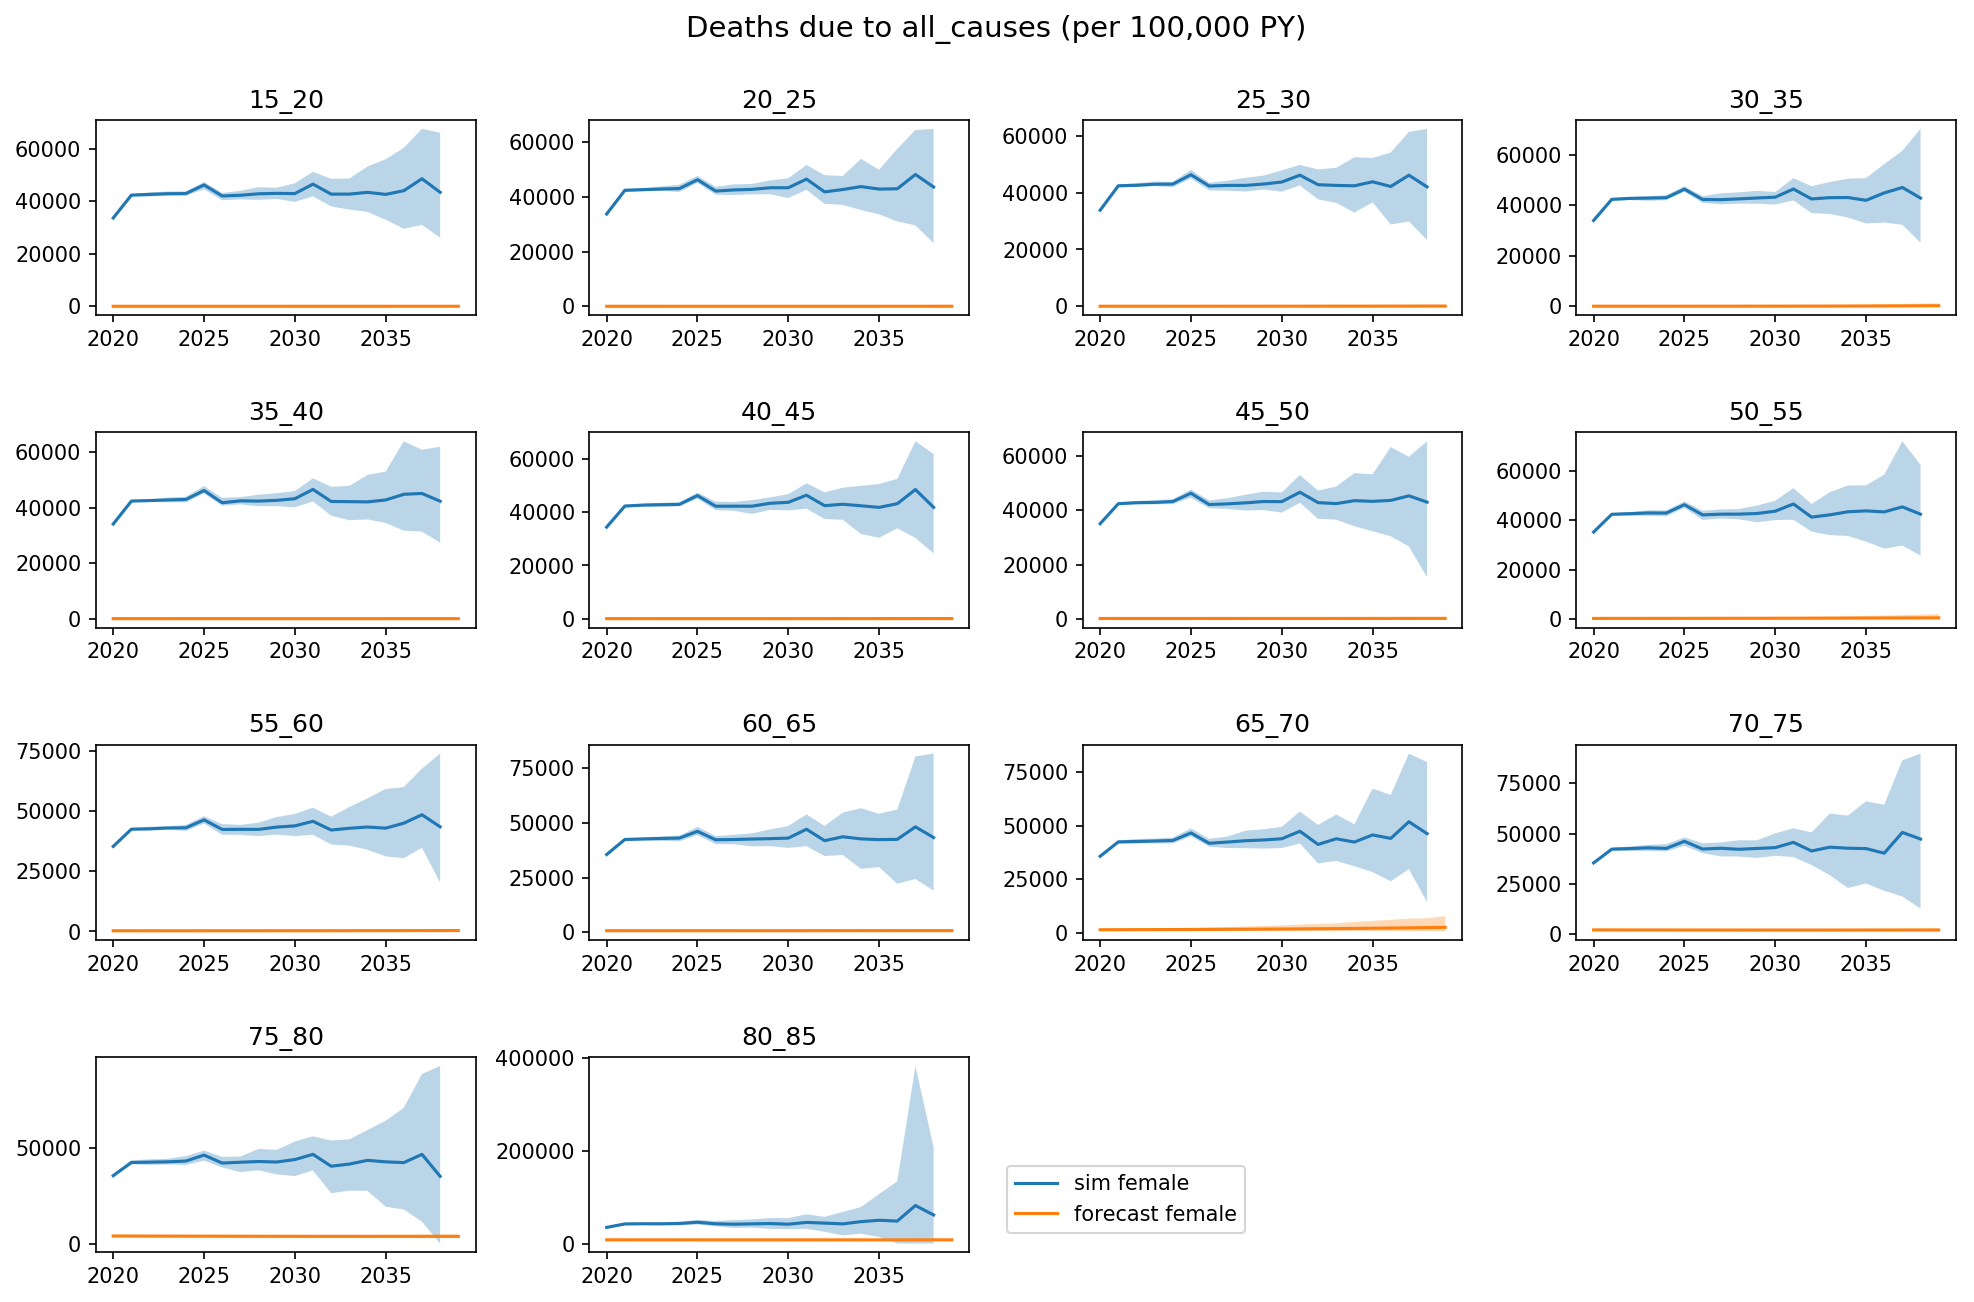

In [44]:
plot_sim_versus_forecast_by_year(csmr_summary, forecast['acmr_forecast.csv'], 'Deaths', 'cause', 'all_causes', 'female')

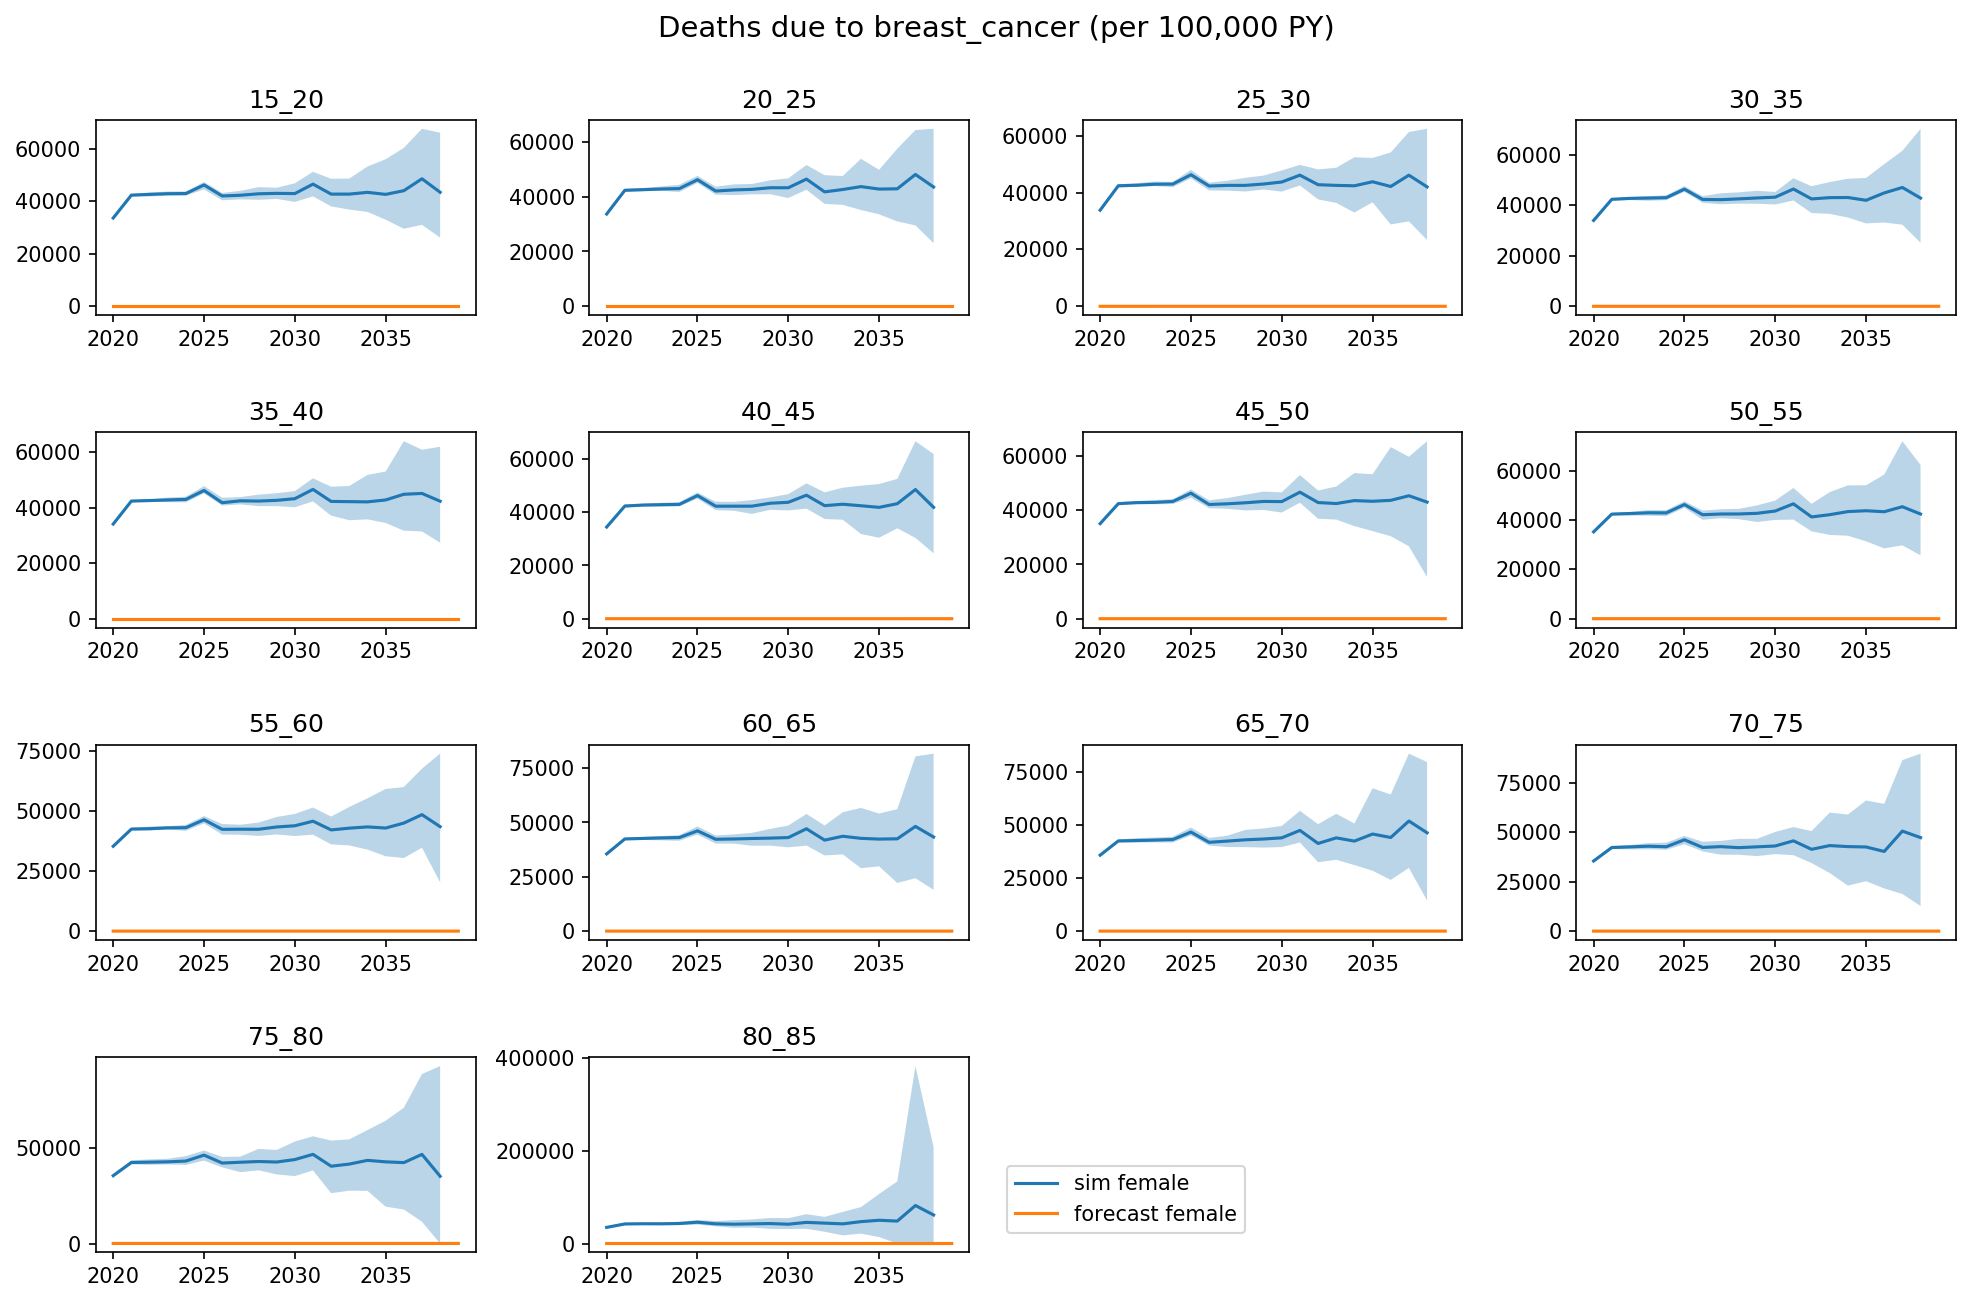

In [45]:
plot_sim_versus_forecast_by_year(csmr_summary, forecast['c429_csmr_forecast.csv'], 'Deaths', 'cause', 'breast_cancer', 'female')

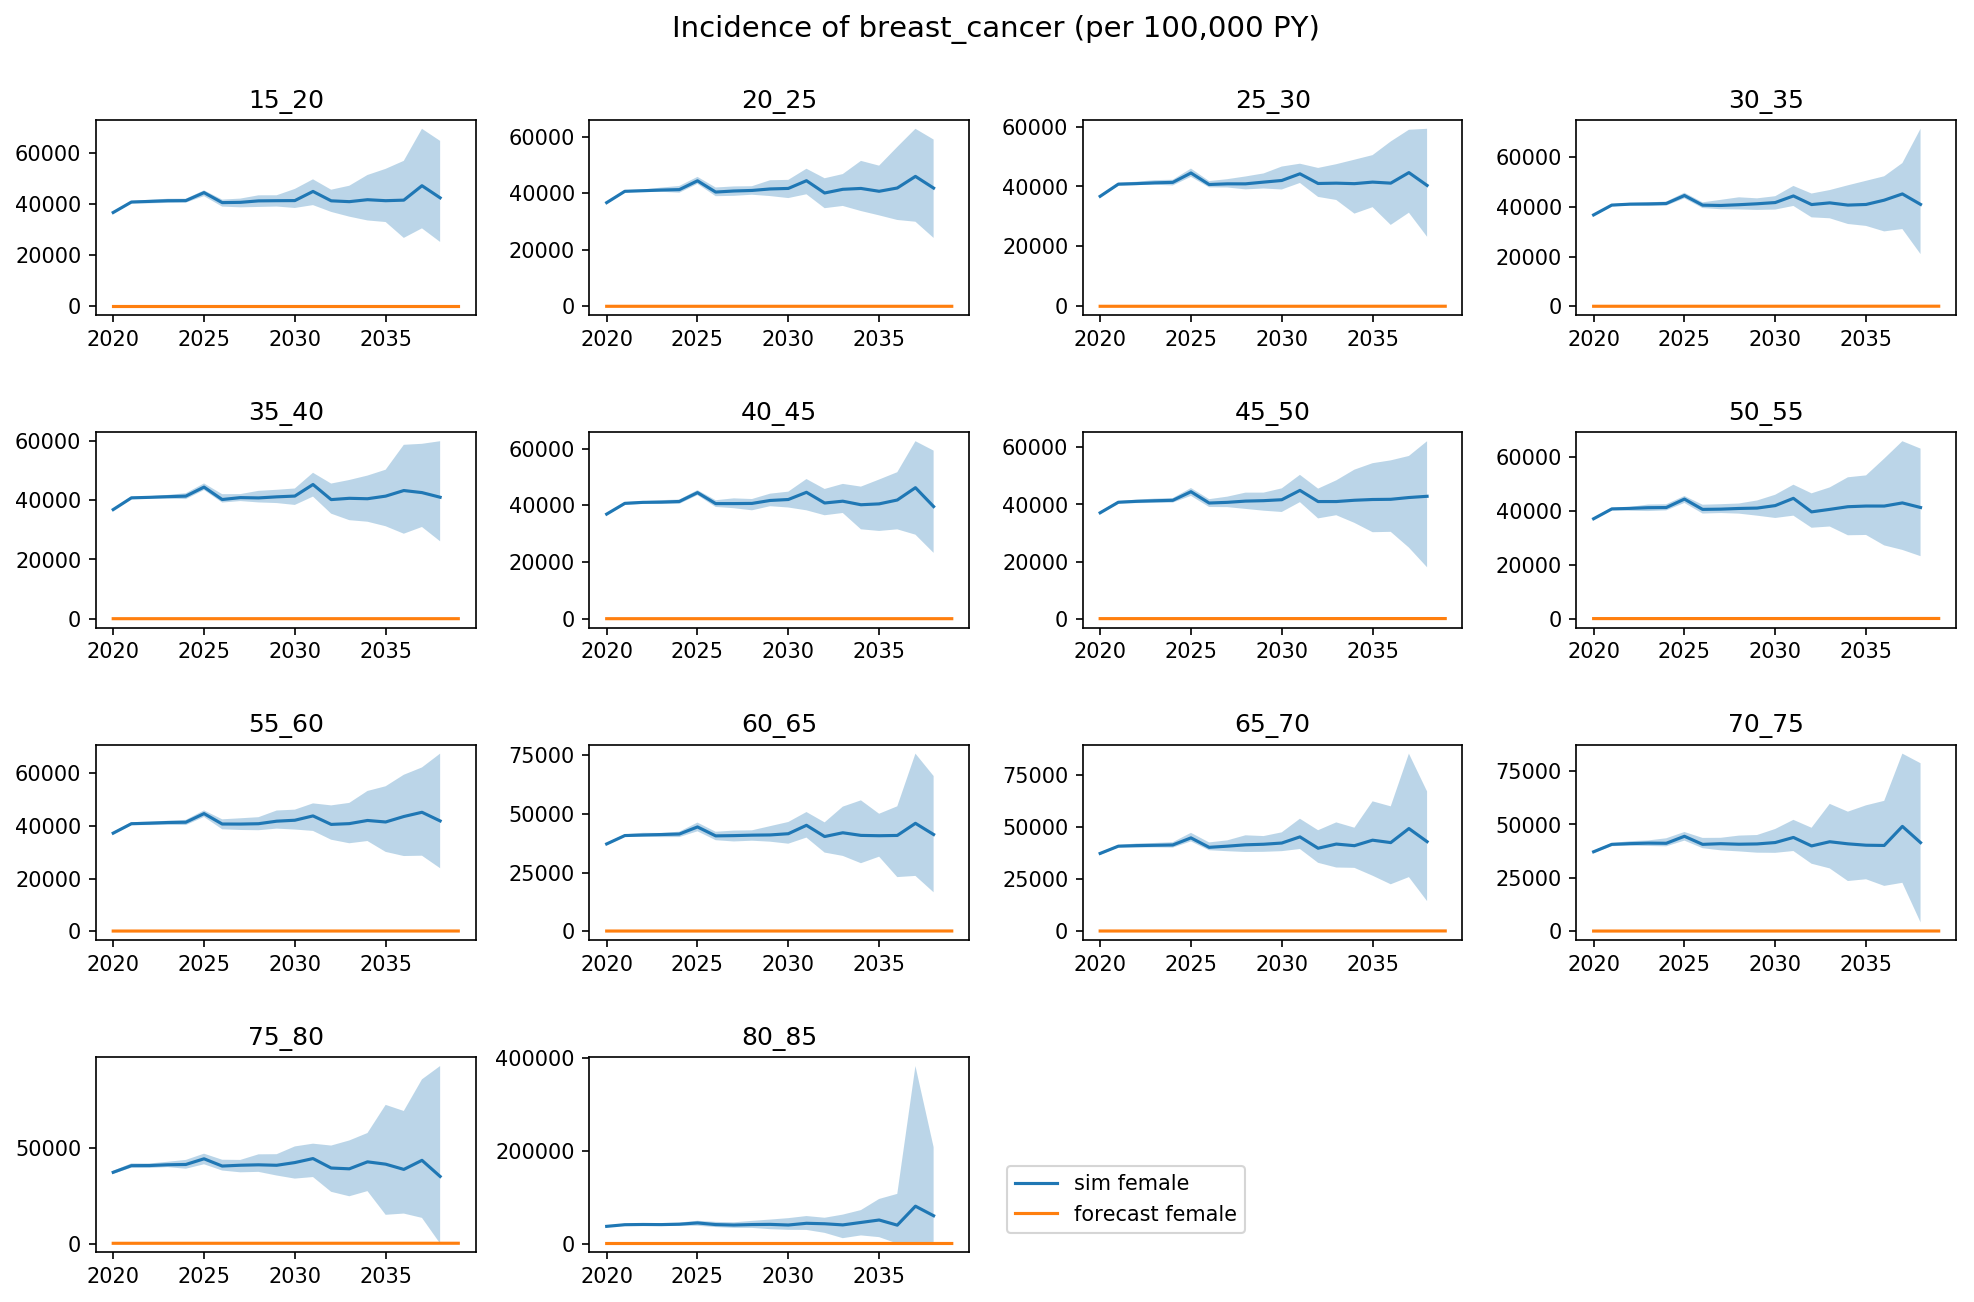

In [46]:
plot_sim_versus_forecast_by_year(incidence_rate_summary, forecast['c429_incidence_forecast.csv'], 
                                 'Incidence', 'measure', 'breast_carcinoma_in_situ_to_breast_cancer_event_count', 'female')

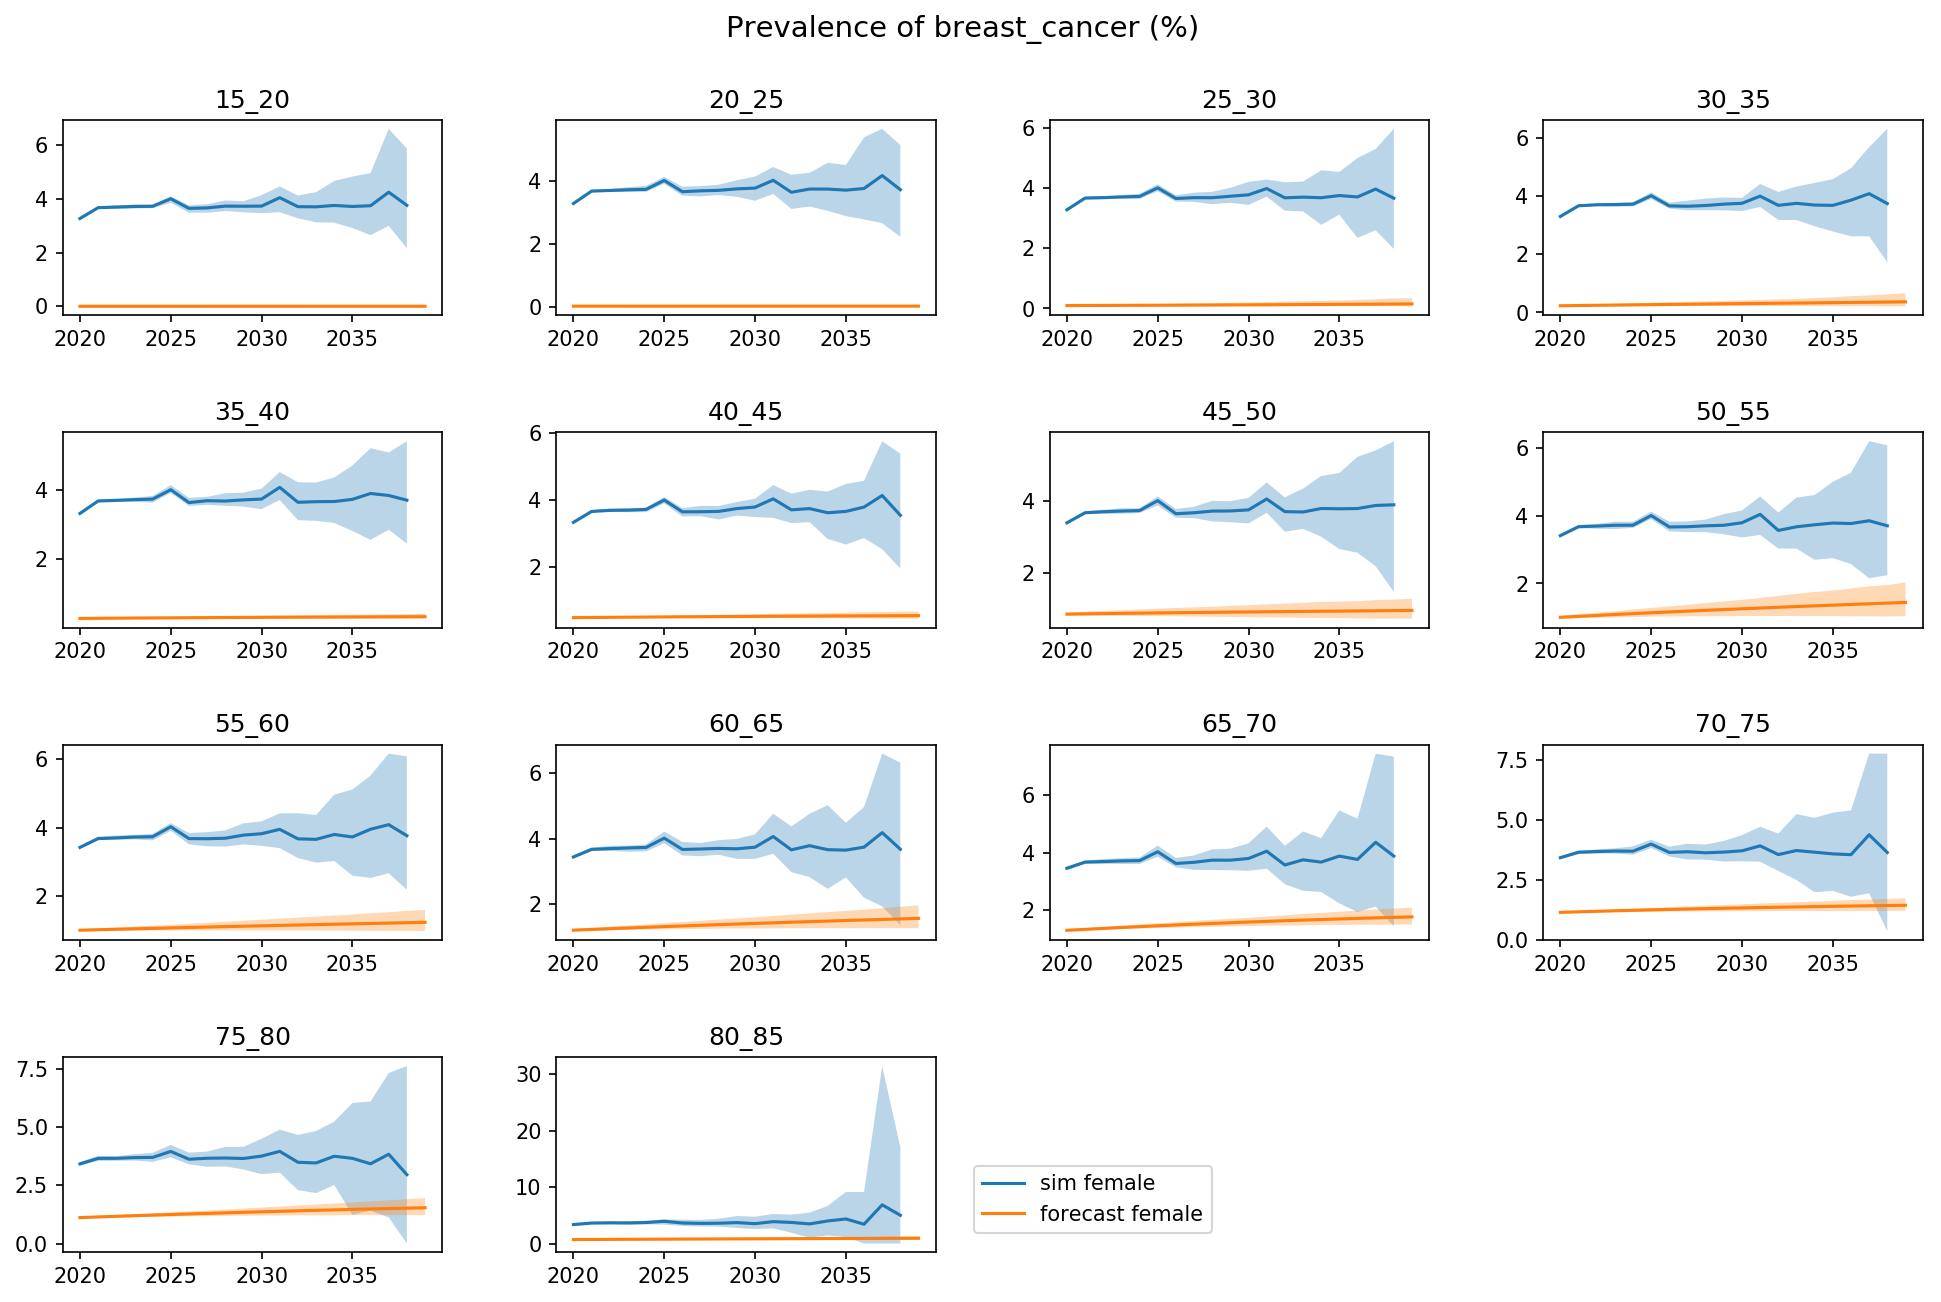

In [47]:
plot_sim_versus_forecast_by_year(prevalence_summary, forecast['c429_prev_forecast.csv'], 
                                 'Prevalence', 'cause', 'breast_cancer', 'female')

In [48]:
def plot_sim_versus_forecast_by_age(sim: pd.DataFrame, forecast: pd.DataFrame, 
                                    measure: str, col_name: str, select: str, year: int):
    forecast = forecast.copy()
    forecast['age_cohort'] = forecast.age.map(age_names)
    sim_sub = sim[getattr(sim, col_name) == select]
    
    plt.figure(figsize=(16, 6), dpi=150)
    
    for i, sex in enumerate(['female', 'male']):
        plt.subplot(1, 2, i+1)
        plt.subplots_adjust(wspace=0.3)
        
        sim_sex = sim_sub[(sim_sub.year == year) & (sim_sub.sex == sex)]
        forecast_sex = forecast[(forecast.year == year) & (forecast.sex == sex)]
        
        plt.plot(sim_sex['age_cohort'], sim_sex['mean'], label='sim')
        plt.plot(forecast_sex['age_cohort'], forecast_sex['mean'], label='forecast')
        plt.fill_between(sim_sex['age_cohort'], sim_sex['2.5%'], sim_sex['97.5%'], alpha=.3)
        plt.fill_between(forecast_sex['age_cohort'], forecast_sex['lb'], forecast_sex['ub'], alpha=.3)
        plt.xticks(rotation=45)
        plt.xlabel('Age group')
        plt.title(f'{sex}, {year}')
    plt.legend(loc=(1.1, .1))
    
    if measure == 'Deaths':
        plt.suptitle(f'{measure} due to {select} (per 100,000 PY)', y=1, fontsize=14)
    elif measure == 'Incidence':
        if select == 'breast_carcinoma_in_situ_to_breast_cancer_event_count':
            select = 'breast_cancer'
        plt.suptitle(f'{measure} of {select} (per 100,000 PY)', y=1, fontsize=14)
    else:
        plt.suptitle(f'{measure} of {select} (%)', y=1, fontsize=14)

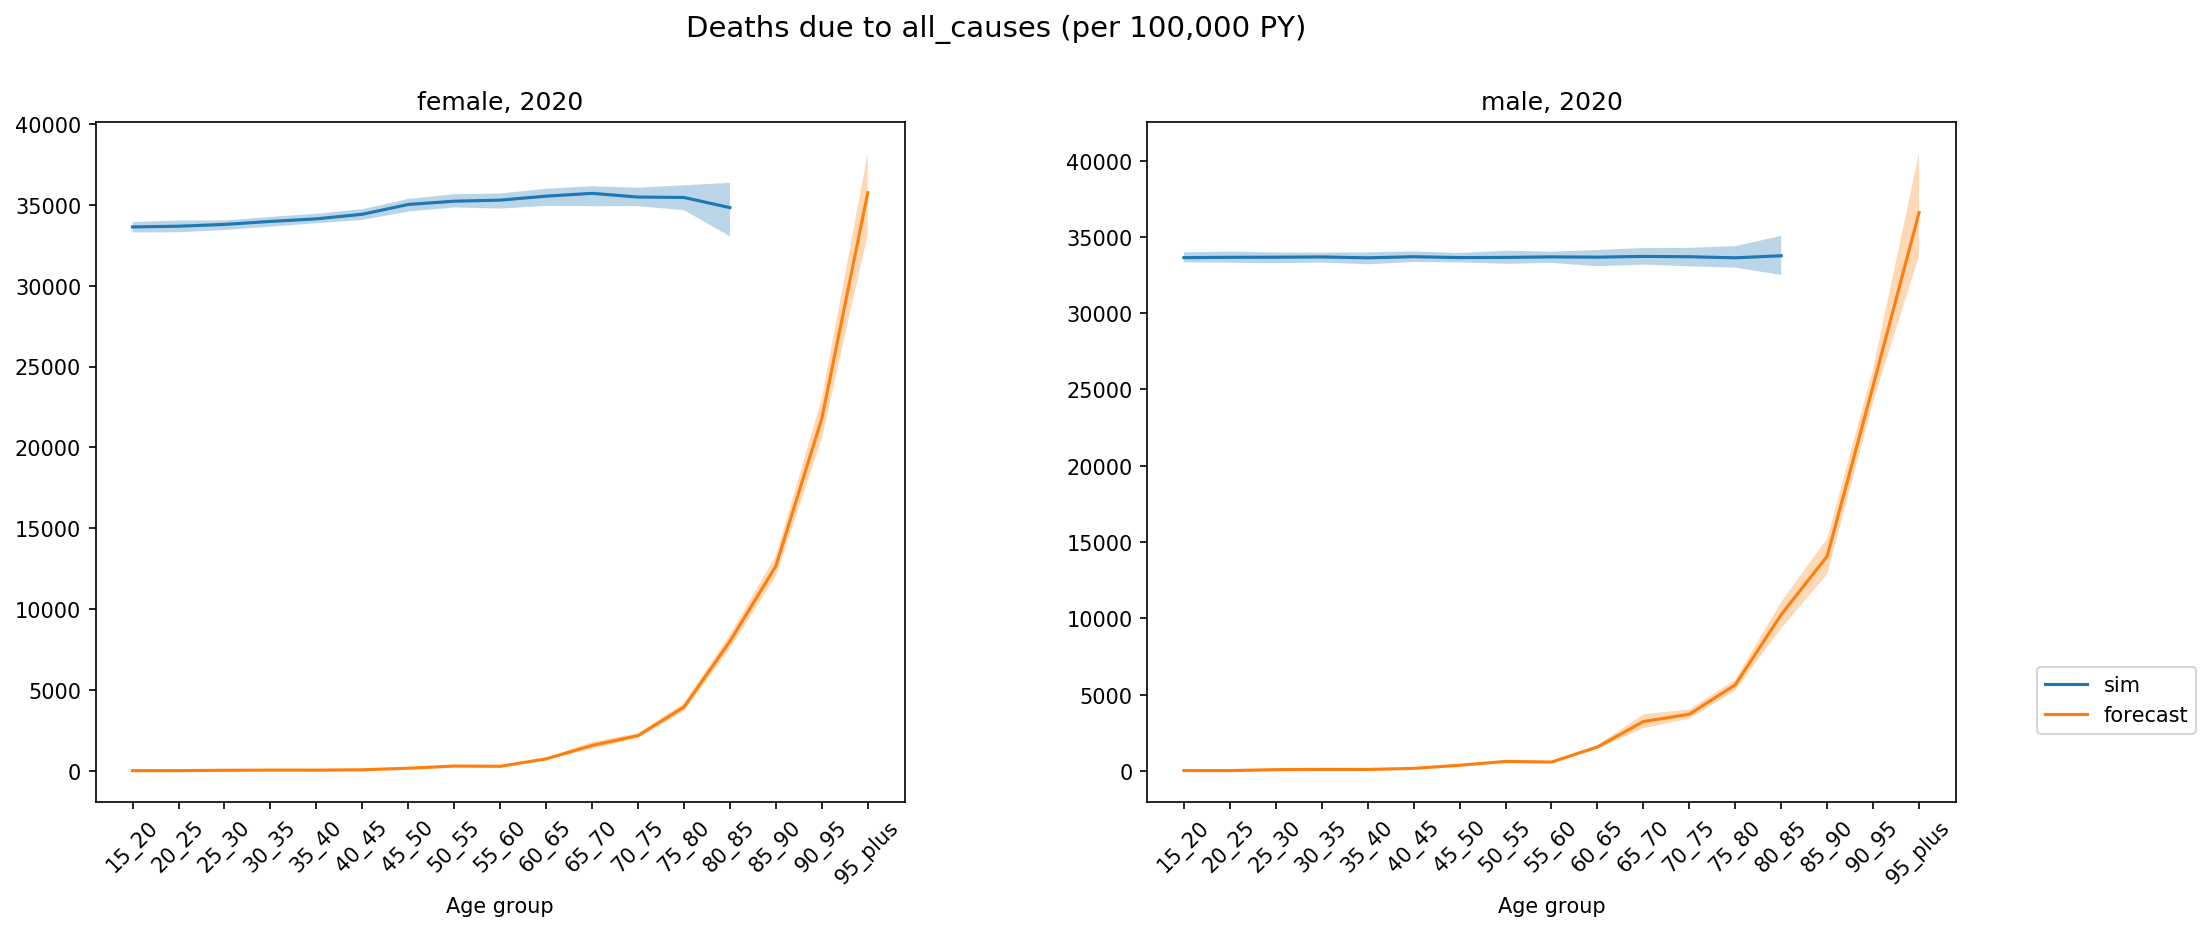

In [49]:
plot_sim_versus_forecast_by_age(csmr_summary, forecast['acmr_forecast.csv'], 'Deaths', 'cause', 'all_causes', 2020)

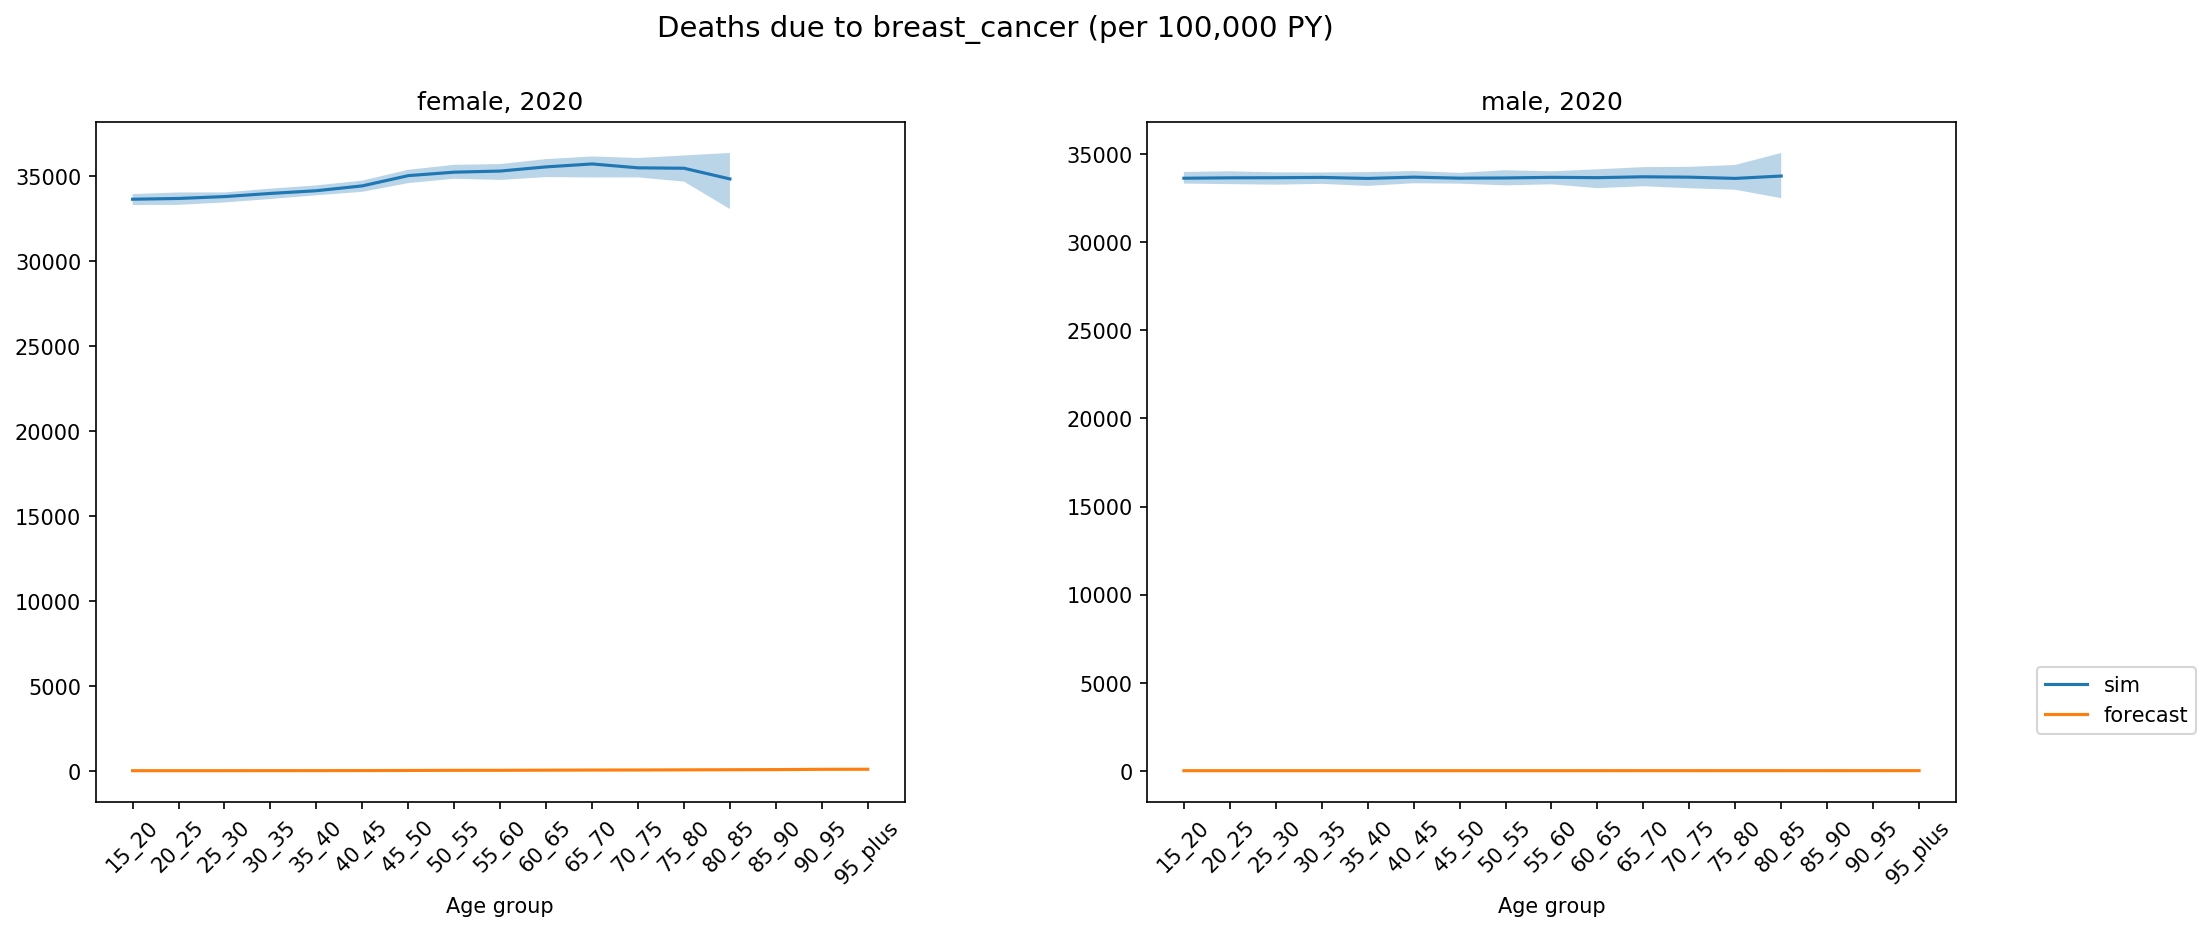

In [50]:
plot_sim_versus_forecast_by_age(csmr_summary, forecast['c429_csmr_forecast.csv'], 'Deaths', 'cause', 'breast_cancer', 2020)

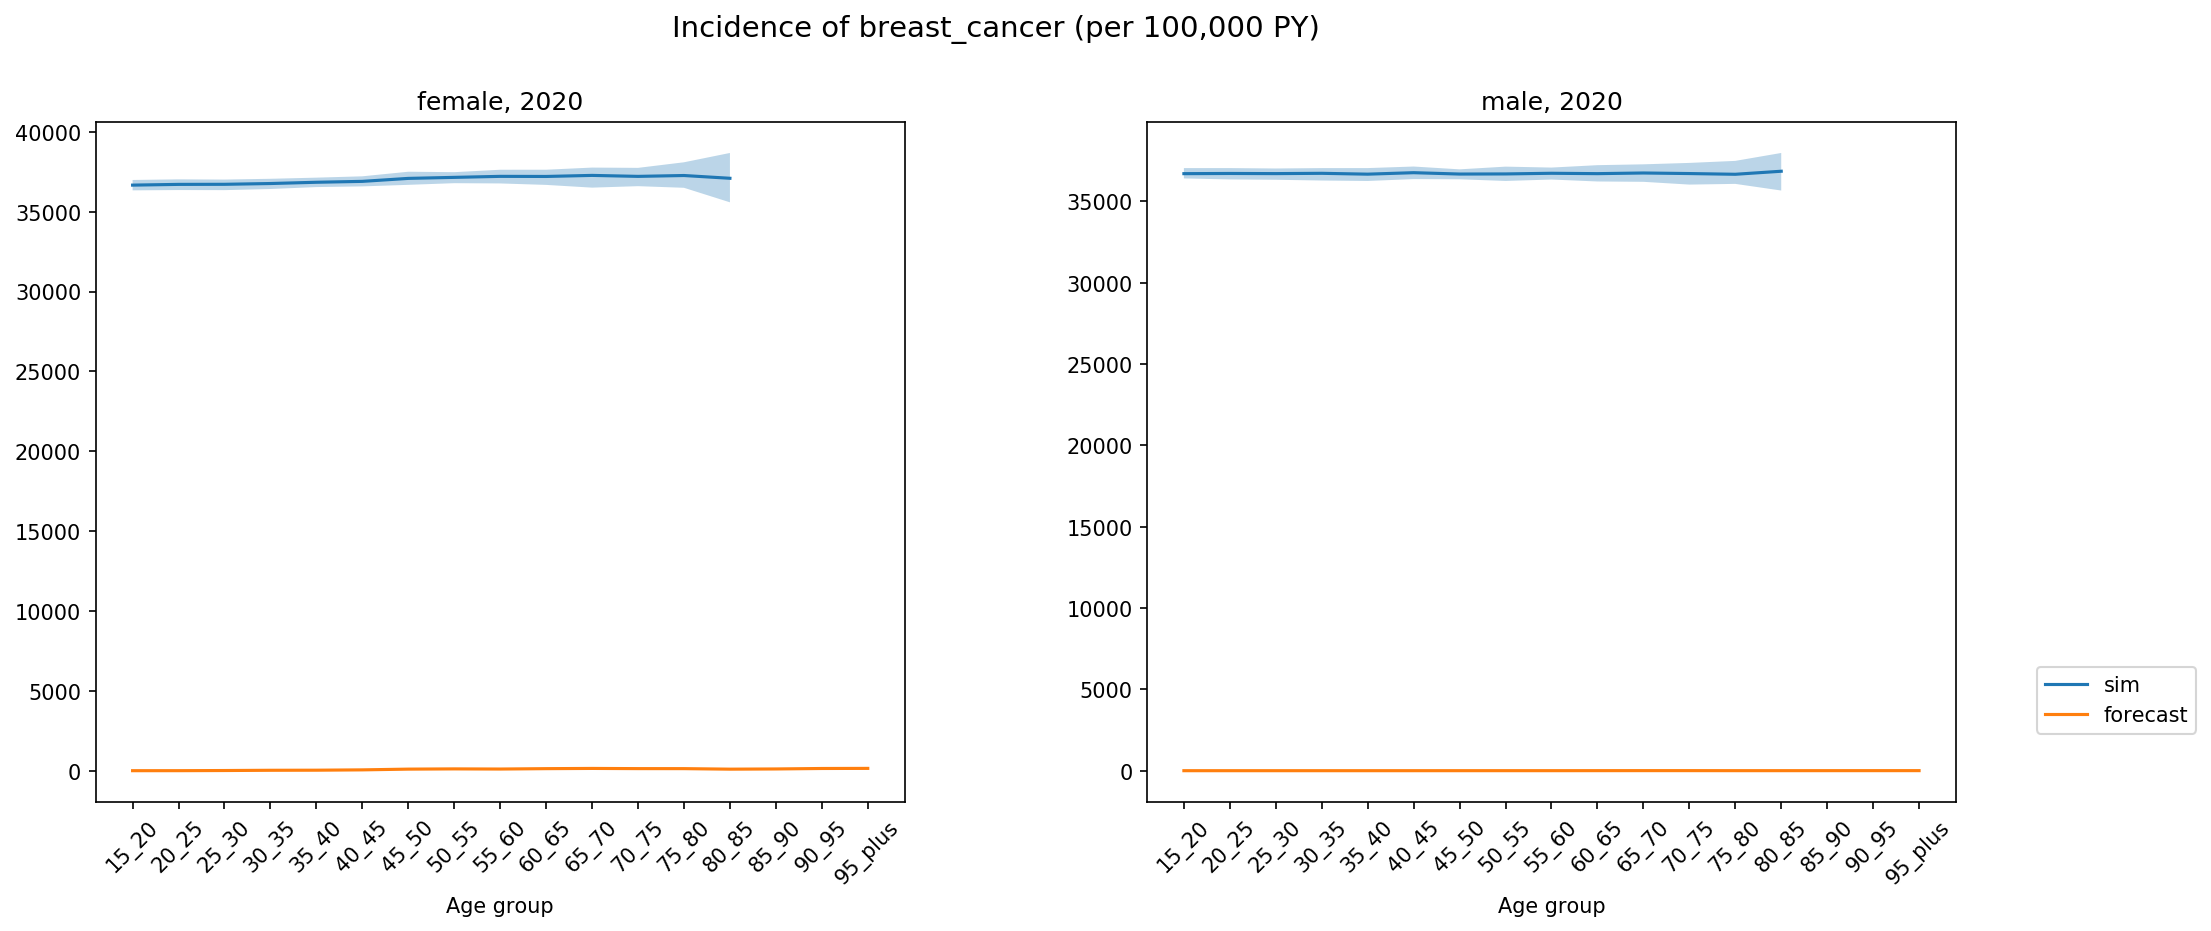

In [51]:
plot_sim_versus_forecast_by_age(incidence_rate_summary, forecast['c429_incidence_forecast.csv'], 
                                'Incidence', 'measure', 'breast_carcinoma_in_situ_to_breast_cancer_event_count', 2020)

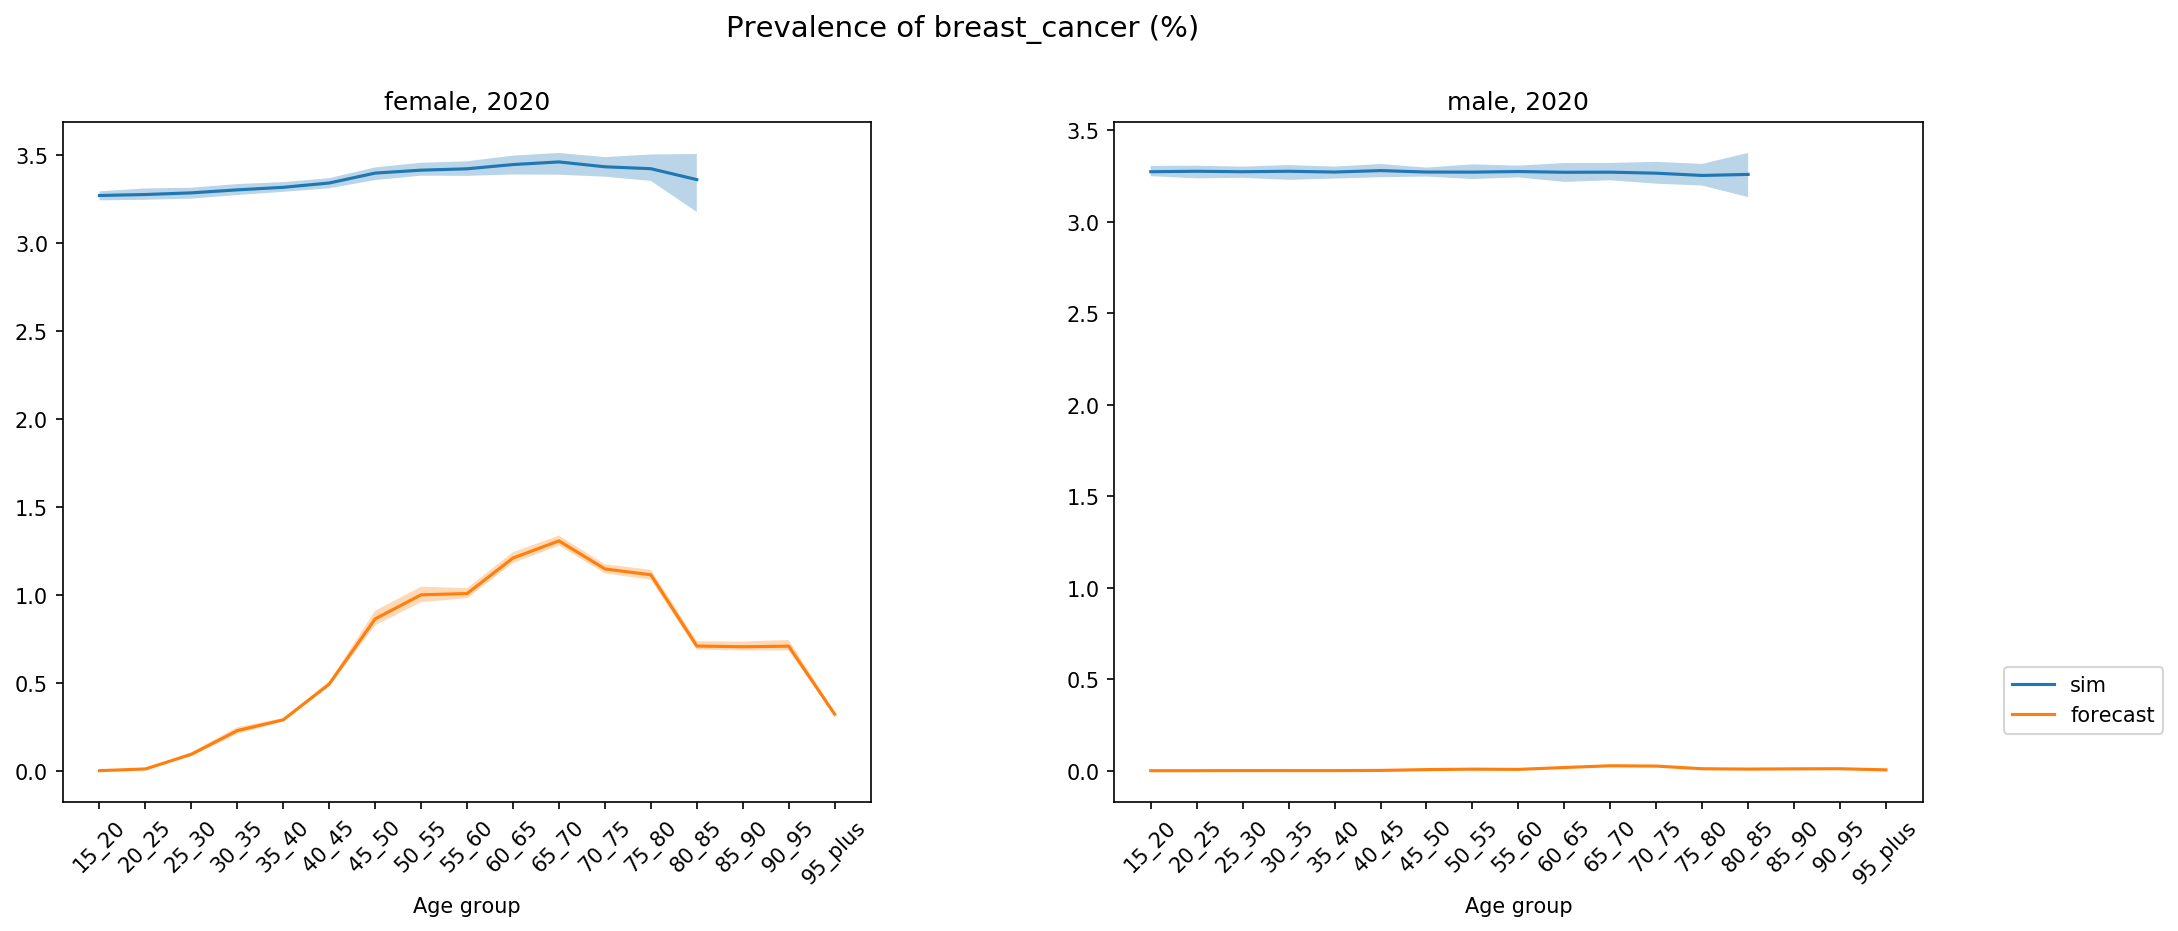

In [52]:
plot_sim_versus_forecast_by_age(prevalence_summary, forecast['c429_prev_forecast.csv'], 
                                'Prevalence', 'cause', 'breast_cancer', 2020)